## EXPLORATORY DATA ANALYSIS

### Name: Eke Agbai
### Assignment: Capstone Project
### Date: February 18, 2025
### Last Updated: April 25, 2024

### Addressing Systemic Issues in Credit Scoring Algorithms

### Community-Driven Credit Education Platform

To further illuminate issues of credit scoring and fairness, we will be analyzing data that examines factors affecting credit scores. This project utilized a publicly available dataset from Kaggle, specifically the "Credit Score Classification" dataset curated by Paris Rohan (https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download).

This dataset contains 150,000 records comprising a range of financial and credit-related variables such as income, debt obligations, credit mix, credit inquiries, and payment behaviors. The dataset is structured to include a target variable categorizing individuals into "Poor," "Standard," or "Good" credit tiers, providing a valuable foundation for classification and fairness analysis.

Using this dataset provides a unique opportunity to delve into the factors that influence credit scores, while also being mindful of its limitations. The fact that it's been synthetically generated for educational and modeling purposes means we can avoid the potential pitfalls of working with sensitive personal data. Despite this, the dataset's diversity and level of detail are remarkably similar to real-world trends, making it an excellent proxy for exploring the biases that can creep into credit evaluation systems.

What's more, the fact that this data is sourced from a platform like Kaggle, which is open-access and peer-curated, adds a layer of transparency and reproducibility to our research. This is essential for ensuring that our work in AI is not only accurate but also ethical. By making the dataset freely available, we're inviting researchers and practitioners to build upon our findings, replicate our results, or even challenge our assumptions. This collaborative approach will ultimately help us create more fair and equitable credit scoring systems.

**Problem Statement**
* Many in minoritized communities struggle to improve credit scores due to lack of transparency, limited financial literacy, and systemic bias leading to financial exclusion and widening wealth gaps and these barriers contribute to financial exclusion and perpetuate wealth disparities.

**Thesis Research Question**

**How can we predict credit score using machine learning–driven platform?**

The platform will fulfill the following criteria:

- Credit scores play a key role in determining financial access and opportunity.

- predict credit scores accurately

- promoting transparency, financial literacy, and

- personalized education to reduce systemic biases and

- improve credit outcomes for individuals in minoritized communities


#### Import Necessary Libraries

In [ ]:
# INSTALL DEPENDENCIES (Colab only)
!pip install fairlearn
!pip install -q scikit-learn keras pandas seaborn matplotlib
# Install SHAP for interpretability
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re
import random
import warnings
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from IPython.display import display
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras import models
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import f_classif
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU, ELU, Activation
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping
import tensorflow as tf
tf.keras.backend.clear_session()
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, demographic_parity_difference

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow INFO logs
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import pandas as pd
import joblib
!pip install fairlearn
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score
# Fairness Auditing
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score
from google.colab import files

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
# Read the CSVs
train_df = pd.read_csv("train.csv", low_memory=False, on_bad_lines='skip')
test_df = pd.read_csv("test.csv", low_memory=False, on_bad_lines='skip')

# STEP 3: Add 'is_train' flags
train_df["is_train"] = True
test_df["is_train"] = False

# STEP 4: Combine both into a single DataFrame for unified processing
df = pd.concat([train_df, test_df], ignore_index=True)

# OPTIONAL: Preview the combined dataset
print(df.shape)
df.head()

(150000, 29)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,is_train
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,True
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,True
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,True
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,True
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,True


In [ ]:
# Create a copy
df0 = df.copy()

In [ ]:
# see info
print(df.info())
print('\n')
# Checkfor duplicates
print(f'There are {df.duplicated().sum()} duplicate values \n\n')

# Check for missing values before cleaning
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [ ]:
# View some of the data in the dataframe
df.head(30)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,is_train
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,True
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,True
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,True
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,True
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,True
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.00,Good,809.98,27.26,22 Years and 6 Months,No,49.57,62.430172331195294,!@9#%8,340.4792117872438,Good,True
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.00,Good,809.98,22.54,22 Years and 7 Months,No,49.57,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,True
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,"1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.00,Good,809.98,23.93,NaN,No,49.57,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,True
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,"3,037.99",2,4,6,1,Credit-Builder Loan,3,4,5.42,2.00,Good,605.03,24.46,26 Years and 7 Months,No,18.82,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,True
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,"3,037.99",2,4,6,1,Credit-Builder Loan,7,1,7.42,2.00,Good,605.03,38.55,26 Years and 8 Months,No,18.82,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,True


## FEATURE EXTRACTION

## Simulating Sensitive Attributes for Fairness Analysis in Credit Scoring

This section takes a closer look at how we simulated sensitive attributes like gender, race, and education in our credit scoring dataset. In the real world, data scientists often face restrictions when it comes to accessing protected attributes due to strict privacy laws and ethical considerations. However, understanding how models perform across different demographic groups is crucial for fairness research and mitigating bias in machine learning.

### Academic Justification
Simulating protected attributes is a widely accepted practice in fairness-focused research and methodology development. Many researchers have used synthetic or probabilistically generated features to:
- Investigate the presence and magnitude of bias in machine learning models
- Test the effectiveness of algorithms designed to enhance fairness
- Uncover systemic disparities when real demographic information is not available

By taking this approach, I can gain valuable insights into how our models behave and make more informed decisions about how to address potential biases. It's essential to note that we've done this simulation transparently, carefully, and based on real-world statistical trends, ensuring that our research is both responsible and meaningful.


### Why This Matters Ethically
It's important to keep in mind that this simulated data isn't meant to represent real demographic groups. Instead, it's a way for us to explore how our models might behave across different hypothetical scenarios.  

By using this kind of simulation, I can better spot potential biases and take steps to build machine learning systems that are fairer and more inclusive. The goal here is to **test and improve**, not to generalize or make assumptions about real people or communities.

### Simulate Gender

To create a realistic simulation of gender in our dataset, I turned to the U.S. Bureau of Labor Statistics (BLS) for guidance. According to their data, the distribution of men and women varies significantly across different occupations. For example:
- In STEM fields like science and engineering, men make up about 72% of the workforce, while women account for around 28% (BLS, 2023).
- In education and healthcare, the numbers are reversed, with women representing about 76% of the workforce and men making up around 24% (BLS, 2023).
- For more general or ambiguous job categories, we assumed a roughly equal split between men and women (50% male / 50% female).

Used these real-world distributions as a basis for creating a simulated 'Gender' column in our dataset. By doing so, I aimed to create a more realistic and nuanced representation of gender in our data.

Source: U.S. Bureau of Labor Statistics, 2023. "Labor Force Statistics from the Current Population Survey." You can find the full report at https://www.bls.gov/cps/cpsaat11.htm.

In [ ]:
np.random.seed(42)

def simulate_gender(row):
    """
    Assign gender based on occupation with realistic gender distributions.

    Parameters:
        row: DataFrame row containing 'Occupation' column

    Returns:
        String: 'Male' or 'Female'
    """
    occupation = str(row['Occupation']).lower()

    # STEM fields (historically male-dominated)
    if 'scientist' in occupation or 'engineer' in occupation:
        return np.random.choice(['Male', 'Female'], p=[0.72, 0.28])

    # Education/healthcare fields (historically female-dominated)
    elif 'teacher' in occupation or 'nurse' in occupation:
        return np.random.choice(['Male', 'Female'], p=[0.24, 0.76])

    # Other occupations (equal probability)
    else:
        return np.random.choice(['Male', 'Female'], p=[0.5, 0.5])

# Apply simulated gender based on occupation
# df['Simulated_Gender'] = df.apply(simulate_gender, axis=1)

## Simulate Race

### High-Income Bracket (>70,000 USD)

### Black Representation in Higher Income Brackets
- **U.S. Bureau of Labor Statistics (2023)**: Approximately 12-15% of Black workers earn over 70,000 annually
- **Federal Reserve's Survey of Consumer Finances (2022)**: About 20% of Black households have incomes above 75,000 USD
- **Economic Policy Institute (2023)**: Black professionals make up approximately 7-10% of higher-income earners across various professional fields
- **Brookings Institution (2022)**: Despite underrepresentation in the highest income quintile, Black Americans constitute approximately 5-8% of this group

### Hispanic Representation
- **Pew Research Center (2023)**: Hispanic workers represent approximately 5-7% of individuals earning over 70,000 USD
- **U.S. Census Bureau (2022)**: Median income for Hispanic households has increased to 62,800, with approximately 18% of Hispanic households earning above 75,000 USD

### Asian and White Representation
- **U.S. Census Bureau American Community Survey (2022)**: Asian households continue to have the highest median income at 101,418 USD
- **Bureau of Labor Statistics (2023)**: Approximately 62% of workers in the highest income quartile identify as White
- **Economic Policy Institute (2022)**: Asian Americans represent about 30% of high-earning STEM professionals despite being 6% of the population

### Middle-Income Bracket (40,000- 70,000 USD)
- **Pew Research Center (2022)**: The middle-income tier shows greater diversity, with:
  - 45% White
  - 25% Black
  - 20% Hispanic
  - 10% Asian
- **Federal Reserve Bank Economic Data (2023)**: While racial gaps persist in middle-income jobs, representation is more balanced compared to high-income positions
- **Census Bureau Current Population Survey (2022)**: The median U.S. household income was $74,580, with significant variation by race and ethnicity

### Lower-Income Bracket (<40,000 USD)
- **U.S. Census Bureau (2022)**: Poverty rates show disproportionate impact:
  - Black: 19.5%
  - Hispanic: 17.1%
  - White: 8.2%
  - Asian: 8.3%
- **Economic Policy Institute (2023)**: Workers earning less than $40,000 were approximately:
  - 35% Black
  - 35% Hispanic
  - 25% White
  - 5% Asian

### Sources
* Urban Institute. (2023). *State of economic equity*. https://www.urban.org/research/publication/state-economic-equity-2023
* Georgetown University Center on Education and the Workforce. (2022). *The economic value of college majors*. https://cew.georgetown.edu/publications/reports
* Federal Reserve Bank. (2022). *Distributional financial accounts (Q4 2022)*. https://www.federalreserve.gov/releases/z1/dataviz/dfa/
* Stanford Center on Poverty and Inequality. (2023). *Annual report: State of the union*. https://inequality.stanford.edu/publications/annual-reports
* Bureau of Labor Statistics. (2023, May). *Occupational employment and wage statistics*. U.S. Department of Labor. https://www.bls.gov/oes/current/oes_nat.htm

In [ ]:
def simulate_race(row):
    """
    Assign race based on income level using simplified demographic distributions.

    Parameters:
        row: DataFrame row containing 'Annual_Income' column

    Returns:
        String: Race category ('White', 'Asian', 'Black', or 'Hispanic')
    """
    # Extract income value, handling potential format issues
    try:
        income = int(str(row['Annual_Income']).replace('$', '').replace(',', ''))
    except (ValueError, TypeError):
        # If conversion fails completely, default to 0
        income = 0

    # High income bracket
    if income > 70000:
        return np.random.choice(
            ['White', 'Asian', 'Black', 'Hispanic'],
            p=[0.55, 0.30, 0.10, 0.05]
        )
    # Middle income bracket
    elif income > 40000:
        return np.random.choice(
            ['White', 'Black', 'Hispanic', 'Asian'],
            p=[0.45, 0.25, 0.20, 0.10]
        )
    # Lower income bracket
    else:
        return np.random.choice(
            ['Black', 'Hispanic', 'White', 'Asian'],
            p=[0.35, 0.35, 0.25, 0.05]
        )

# Apply simulated race based on income distribution
df['Simulated_Race'] = df.apply(simulate_race, axis=1)

## Simulating Education Level

To simulate education levels in the dataset, I looked at how education attainment typically relates to age and work experience. Since we don't have direct age data, I used **"Credit_History_Age"** as a stand-in, assuming that a longer credit history usually correlates with older age and more career experience.

Here’s how I approached it:

- **20+ years of credit history**: These individuals are likely older and further along in their careers. Based on career trajectories and national data, they're more likely to hold **advanced degrees** like a Bachelor's, Master's, or Doctorate. According to the U.S. Census, around **13.1%** of Americans have a graduate or professional degree, and about **21%** hold a Bachelor's degree only.

- **10–20 years of credit history**: This group likely includes mid-career professionals—people who’ve had enough time to finish college and build work experience. They’re more likely to have **some college** or a **Bachelor’s degree**.

- **Fewer than 10 years of credit history**: These individuals are probably younger, just entering the workforce or still pursuing higher education. It's reasonable to assume many are in the **early stages** of their careers or still in school.

These assumptions are grounded in publicly available data from sources like:
- U.S. Census Bureau (2021), *Educational Attainment in the United States*
- National Center for Education Statistics (NCES), *Digest of Education Statistics 2022*
- Bureau of Labor Statistics (2023). *Employment Projections by Educational Attainment*
- Federal Reserve Bank of New York (2022). *The Labor Market for Recent College Graduates*

Overall, this method helps create a more realistic and informed simulation of education levels, while recognizing the natural link between age, experience, and educational background.

In [ ]:
def simulate_education(row):
    """
    Assign education level based on credit history length.

    Parameters:
        row: DataFrame row containing 'Credit_History_Age' column

    Returns:
        String: Education level category
    """
    # Extract years from credit history age
    credit_history = str(row['Credit_History_Age'])

    try:
        # Extract the numeric part before any space
        credit_years = int(credit_history.split()[0])
    except (ValueError, IndexError):
        # Default value if parsing fails
        credit_years = 5

    # Long credit history (20+ years) - higher education probability
    if credit_years >= 20:
        return np.random.choice(
            ['High School', 'Some College', 'Bachelors', 'Masters', 'Doctorate'],
            p=[0.15, 0.15, 0.40, 0.20, 0.10]
        )
    # Medium credit history (10-19 years)
    elif credit_years >= 10:
        return np.random.choice(
            ['High School', 'Some College', 'Technical Certification', 'Bachelors', 'Masters'],
            p=[0.20, 0.25, 0.15, 0.30, 0.10]
        )
    # Short credit history (under 10 years)
    else:
        return np.random.choice(
            ['High School', 'Some College', 'Technical Certification', 'Bachelors'],
            p=[0.40, 0.30, 0.20, 0.10]
        )

# Apply simulated education based on credit history
# df['Simulated_Education'] = df.apply(simulate_education, axis=1)

In [ ]:
# Preview dataset with simulated sensitive attributes
df[['Occupation', 'Annual_Income', 'Credit_History_Age', 'Simulated_Race']].head()

,Occupation,Annual_Income,Credit_History_Age,Simulated_Race
0,Scientist,19114.12,22 Years and 1 Months,Hispanic
1,Scientist,19114.12,NaN,Asian
2,Scientist,19114.12,22 Years and 3 Months,White
3,Scientist,19114.12,22 Years and 4 Months,Hispanic
4,Scientist,19114.12,22 Years and 5 Months,Black


In [ ]:
print("STARTING FEATURE EXTRACTION: Converting Credit History Age to numeric months")
print(df[["Customer_ID", "Credit_History_Age"]].head())

def convert_credit_history_to_months(age_string):
    """
    Converts a 'Years and Months' formatted string into total months.
    Handles missing values and incorrect formats.
    Parameters:
    - age_string (str): Credit history age in the format 'X Years and Y Months'.
    Returns:
    - int: Total months of credit history, or NaN if invalid.
    """
    if pd.isna(age_string) or not isinstance(age_string, str):
        return np.nan  # Return NaN for missing or invalid values
    try:
        parts = age_string.split()
        years = int(parts[0])  # Extract years
        months = int(parts[3])  # Extract months
        return years * 12 + months  # Convert to total months
    except (IndexError, ValueError):
        return np.nan  # Return NaN for incorrect format

print("  EXTRACTION: Converting string representation to numeric months...")
# Apply the conversion function to transform 'Credit_History_Age'
df["Credit_History_Age"] = df["Credit_History_Age"].apply(convert_credit_history_to_months)
print("FEATURE EXTRACTION: Intermediate result after string conversion:")
print(df[["Customer_ID", "Credit_History_Age"]].head())

print("FEATURE EXTRACTION: Handling missing values in Credit_History_Age...")
# Group by 'Customer_ID' and impute missing values using mode
df["Credit_History_Age"] = df.groupby("Customer_ID")["Credit_History_Age"].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x.median())
)

print("FEATURE EXTRACTION COMPLETE: Final Credit_History_Age feature")
print(df[["Customer_ID", "Credit_History_Age"]].head())

STARTING FEATURE EXTRACTION: Converting Credit History Age to numeric months
  Customer_ID     Credit_History_Age
0   CUS_0xd40  22 Years and 1 Months
1   CUS_0xd40                    NaN
2   CUS_0xd40  22 Years and 3 Months
3   CUS_0xd40  22 Years and 4 Months
4   CUS_0xd40  22 Years and 5 Months
  EXTRACTION: Converting string representation to numeric months...
FEATURE EXTRACTION: Intermediate result after string conversion:
  Customer_ID  Credit_History_Age
0   CUS_0xd40              265.00
1   CUS_0xd40                 NaN
2   CUS_0xd40              267.00
3   CUS_0xd40              268.00
4   CUS_0xd40              269.00
FEATURE EXTRACTION: Handling missing values in Credit_History_Age...
FEATURE EXTRACTION COMPLETE: Final Credit_History_Age feature
  Customer_ID  Credit_History_Age
0   CUS_0xd40              265.00
1   CUS_0xd40              265.00
2   CUS_0xd40              267.00
3   CUS_0xd40              268.00
4   CUS_0xd40              269.00


## DATA CLEANING

### Analysis and Cleaning of Numeric Features

In [ ]:
# Extract numeric columns
num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan",
            "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt",
            "Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]

cat_cols = ["Occupation","Credit_Mix", "Spending_Habit","Payment_Size","Payment_of_Min_Amount", "Simulated_Race"]

target_col = ["Credit_Score"]

In [ ]:
class NumericDataCleaner:
    def __init__(self, df, numeric_cols):
        """
        Initializes the NumericDataCleaner with a DataFrame and a list of numeric columns to clean.

        Parameters:
        dataframe: The DataFrame to clean.
        numeric_columns (list): List of column names that should be numeric.
        """
        self.df = df
        self.numeric_cols = numeric_cols

    def clean_numeric_cols(self):
        """
        Cleans the specified numeric columns by:
        - Extracting numerical values if stored as strings.
        - Converting them to numeric types.
        - Replacing missing values (NaN) with the median of each column.

        Returns:
        Cleaned DataFrame.
        """
        for col in self.numeric_cols:
            # Convert object-type columns with mixed data to numeric
            if self.df[col].dtype == 'object':
                # Extract numeric part
                self.df[col] = pd.to_numeric(
                    self.df[col].str.extract(r'(\d+\.?\d*)')[0], errors='coerce'
                )

            # Fill NaN values with column median
            if self.df[col].isna().sum() > 0:
                self.df[col] = self.df[col].fillna(self.df[col].median())

        return self.df

df_cleaner = NumericDataCleaner(df, num_cols)
df = df_cleaner.clean_numeric_cols()

In [ ]:
# Clean Age:
def correct_age(series):
    # Remove underscores
    cleaned = series.astype(str).str.replace('_', '', regex=False)
    # Convert to numeric
    numeric = pd.to_numeric(cleaned, errors='coerce')

    # Define valid age range
    valid_range = (numeric >= 18) & (numeric <= 100)

    # Get the valid ages in the series
    valid_ages = numeric[valid_range]

    if not valid_ages.empty:
        correct_value = valid_ages.mode()[0]
        numeric.loc[~valid_range] = correct_value
    return numeric

# Apply the function to each borrower
df['Age'] = df.groupby('Customer_ID')['Age'].transform(correct_age)

# Inspect the cleaned Age values
print(df[['Customer_ID', 'Age']].head(10))

  Customer_ID  Age
0   CUS_0xd40   23
1   CUS_0xd40   23
2   CUS_0xd40   23
3   CUS_0xd40   23
4   CUS_0xd40   23
5   CUS_0xd40   23
6   CUS_0xd40   23
7   CUS_0xd40   23
8  CUS_0x21b1   28
9  CUS_0x21b1   28


## FEATURE EXTRACTION

In [ ]:
print("STARTING FEATURE EXTRACTION: Processing Payment_Behaviour data")

# Define a valid pattern for Payment Behaviour
valid_pattern = r"^(High|Low)_spent_(Small|Medium|Large)_value_payments$"

print("FEATURE EXTRACTION: Filtering out invalid Payment_Behaviour entries...")
# Remove invalid values (!@9#%8 and other incorrect entries) and create a copy to avoid the warning
df = df[df["Payment_Behaviour"].str.match(valid_pattern, na=False)].copy()

print("FEATURE EXTRACTION: Splitting Payment_Behaviour into component features...")
# Split 'Payment_Behaviour' into two separate columns: 'Spending_Habit' and 'Payment_Size'
df[['Spending_Habit', 'Payment_Size']] = df["Payment_Behaviour"].str.split('_', n=1, expand=True)

print("FEATURE EXTRACTION: Refining Payment_Size feature...")
# Extract the first part before the last underscore (removes trailing parts)
df['Payment_Size'] = df['Payment_Size'].str.rsplit('_', n=1, expand=True)[0]
df['Payment_Size'] = df['Payment_Size'].str.rsplit('_', n=1, expand=True)[0]

print("FEATURE EXTRACTION: Cleaning Payment_Size feature...")
# Remove the prefix 'spent_' from 'Payment_Size'
df['Payment_Size'] = df['Payment_Size'].str.replace('spent_', '', regex=True)

print("FEATURE EXTRACTION COMPLETE: Created Spending_Habit and Payment_Size features")
# Display the cleaned DataFrame
print(df[['Payment_Behaviour', 'Spending_Habit', 'Payment_Size']].head())

STARTING FEATURE EXTRACTION: Processing Payment_Behaviour data
FEATURE EXTRACTION: Filtering out invalid Payment_Behaviour entries...
FEATURE EXTRACTION: Splitting Payment_Behaviour into component features...
FEATURE EXTRACTION: Refining Payment_Size feature...
FEATURE EXTRACTION: Cleaning Payment_Size feature...
FEATURE EXTRACTION COMPLETE: Created Spending_Habit and Payment_Size features
                  Payment_Behaviour Spending_Habit Payment_Size
0   High_spent_Small_value_payments           High        Small
1    Low_spent_Large_value_payments            Low        Large
2   Low_spent_Medium_value_payments            Low       Medium
3    Low_spent_Small_value_payments            Low        Small
4  High_spent_Medium_value_payments           High       Medium


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,is_train,Simulated_Race,Spending_Habit,Payment_Size
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,"19,114.12","1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,4.00,_,809.98,26.82,265.00,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good,True,Hispanic,High,Small
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,"19,114.12","3,091.00",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.00,11.27,4.00,Good,809.98,31.94,265.00,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good,True,Asian,Low,Large
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,"19,114.12","3,091.00",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,9.41,4.00,Good,809.98,28.61,267.00,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good,True,White,Low,Medium
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,"19,114.12","3,091.00",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.00,6.27,4.00,Good,809.98,31.38,268.00,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good,True,Hispanic,Low,Small
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,"19,114.12","1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.00,11.27,4.00,Good,809.98,24.80,269.00,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good,True,Black,High,Medium


In [ ]:
print("STARTING FEATURE EXTRACTION & CLEANING: Processing Annual Income and Occupation data")

# Define Occupation Mapping
print("FEATURE EXTRACTION: Creating occupation categories from specific job titles...")
occupation_mapping = {
    "Scientist": "STEM",
    "Engineer": "STEM",
    "Developer": "STEM",
    "Teacher": "Education & Media",
    "Journalist": "Education & Media",
    "Writer": "Education & Media",
    "Doctor": "Healthcare",
    "Mechanic": "Self-Employed",
    "Manager": "Business & Finance",
    "Lawyer": "Business & Finance",
    "Accountant": "Business & Finance",
    "Musician": "Creative & Arts",
    "Media_Manager": "Creative & Arts",
    "Architect": "Creative & Arts",
    "Entrepreneur": "Self-Employed",
    "_______": None  # Mark as NaN for proper handling
}

# Apply mapping directly to the "Occupation" column
print("FEATURE EXTRACTION: Applying occupation category mapping...")
df["Occupation"] = df["Occupation"].map(occupation_mapping)

# Replace missing values in Occupation by grouping on Customer_ID
print("DATA CLEANING: Handling missing occupation values by customer grouping...")
df["Occupation"] = df.groupby("Customer_ID")["Occupation"].transform(
    lambda x: x.fillna(
        x.mode()[0] if not x.mode().empty
        else (x.value_counts().idxmax() if not x.value_counts().empty else "Unknown")
    )
)

# Apply Label Encoding to Occupation

# Display the first few rows to verify the changes
print("FEATURE EXTRACTION: Updated Occupation categories:")
print(df[["Customer_ID", "Occupation"]].head())

# Handle Annual_Income
print("DATA CLEANING: Converting Annual_Income to numeric format...")
# Convert Annual_Income to numeric, forcing errors to NaN
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors='coerce')

print("DATA CLEANING: Computing median income by occupation for imputation...")
# Compute median Annual_Income per Occupation_Category
occupation_median_income = df.groupby("Occupation")["Annual_Income"].median()

print("DATA CLEANING: Filling missing Annual_Income values with occupation-specific medians...")
# Fill missing values with category-specific median
df["Annual_Income"] = df.apply(
    lambda row: occupation_median_income[row["Occupation"]]
    if pd.isnull(row["Annual_Income"]) else row["Annual_Income"],
    axis=1
)

# Check for Outliers Using IQR (but keep them)
print("DATA QUALITY CHECK: Identifying potential outliers in Annual_Income...")
Q1 = df["Annual_Income"].quantile(0.25)
Q3 = df["Annual_Income"].quantile(0.75)
IQR = Q3 - Q1
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count outliers but keep them
num_outliers = df[(df["Annual_Income"] < lower_bound) | (df["Annual_Income"] > upper_bound)].shape[0]
print(f"DATA QUALITY REPORT: Number of detected outliers in Annual_Income: {num_outliers}")
print("FEATURE EXTRACTION & CLEANING COMPLETE: Annual Income and Occupation processing finished")

STARTING FEATURE EXTRACTION & CLEANING: Processing Annual Income and Occupation data
FEATURE EXTRACTION: Creating occupation categories from specific job titles...
FEATURE EXTRACTION: Applying occupation category mapping...
DATA CLEANING: Handling missing occupation values by customer grouping...
FEATURE EXTRACTION: Updated Occupation categories:
  Customer_ID Occupation
0   CUS_0xd40       STEM
1   CUS_0xd40       STEM
2   CUS_0xd40       STEM
3   CUS_0xd40       STEM
4   CUS_0xd40       STEM
DATA CLEANING: Converting Annual_Income to numeric format...
DATA CLEANING: Computing median income by occupation for imputation...
DATA CLEANING: Filling missing Annual_Income values with occupation-specific medians...
DATA QUALITY CHECK: Identifying potential outliers in Annual_Income...
DATA QUALITY REPORT: Number of detected outliers in Annual_Income: 3840
FEATURE EXTRACTION & CLEANING COMPLETE: Annual Income and Occupation processing finished


## DATA CLEANING CONTNUES

In [ ]:
# Cleaning Num_Bank_Accounts, Interest_Rate, Num_Credit_Card, and Num_of_Loan:
def correct_numeric(series, valid_min, valid_max):
    # Remove underscores from the series values
    cleaned = series.astype(str).str.replace('_', '', regex=False)
    numeric = pd.to_numeric(cleaned, errors='coerce')

    # Create a mask for valid values
    valid_mask = (numeric >= valid_min) & (numeric <= valid_max)
    valid_values = numeric[valid_mask]

    if not valid_values.empty:
        # Choose the mode (most common valid value) as the "correct" value for the group
        correct_value = valid_values.mode()[0]
        numeric.loc[~valid_mask] = correct_value
    return numeric

# Define the columns and their valid ranges
columns_info = {
    'Num_Bank_Accounts': (0, 50),
    'Interest_Rate': (0, 100),
    'Num_Credit_Card': (0, 20),
    'Num_of_Loan': (0, 20)
}

# Group by 'Customer_ID' and apply the cleaning function to each column
for col, (valid_min, valid_max) in columns_info.items():
    df[col] = df.groupby('Customer_ID')[col].transform(
        lambda x: correct_numeric(x, valid_min, valid_max)
    )

# Inspect the cleaned columns for a few borrowers
print(df[['Customer_ID', 'Num_Bank_Accounts', 'Interest_Rate', 'Num_Credit_Card', 'Num_of_Loan']].head(10))

   Customer_ID  Num_Bank_Accounts  Interest_Rate  Num_Credit_Card  Num_of_Loan
0    CUS_0xd40                  3              3                4            4
1    CUS_0xd40                  3              3                4            4
2    CUS_0xd40                  3              3                4            4
3    CUS_0xd40                  3              3                4            4
4    CUS_0xd40                  3              3                4            4
6    CUS_0xd40                  3              3                4            4
7    CUS_0xd40                  3              3                4            4
8   CUS_0x21b1                  2              6                4            1
9   CUS_0x21b1                  2              6                4            1
10  CUS_0x21b1                  2              6                4            1


In [ ]:
# Clean Outstanding_Debt:
# Remove underscores and convert the column to numeric.
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace('_', '', regex=False)
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

# Clean Delay_from_due_date:
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: max(x, 0))

# Inspect the cleaned data
print(df[['Outstanding_Debt', 'Delay_from_due_date']].head())

   Outstanding_Debt  Delay_from_due_date
0            809.98                    3
1            809.98                    0
2            809.98                    3
3            809.98                    5
4            809.98                    6


In [ ]:
# Cleaning Num_of_Delayed_Payment:

# Clean the Num_of_Delayed_Payment column by removing underscores and converting to numeric
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str).str.replace('_', '', regex=False)
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Cap the value based on the sum of Num_Credit_Card and Num_of_Loan for each row
def cap_delayed_payment(row):
    plausible_max = row['Num_Credit_Card'] + row['Num_of_Loan']
    return min(row['Num_of_Delayed_Payment'], plausible_max)

df['Num_of_Delayed_Payment'] = df.apply(cap_delayed_payment, axis=1)

# Fill missing values by grouping by Customer_ID and using transform on the column
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

# Inspect the cleaned column
print(df[['Customer_ID', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment']].head(10))

   Customer_ID  Num_Credit_Card  Num_of_Loan  Num_of_Delayed_Payment
0    CUS_0xd40                4            4                    7.00
1    CUS_0xd40                4            4                    8.00
2    CUS_0xd40                4            4                    7.00
3    CUS_0xd40                4            4                    4.00
4    CUS_0xd40                4            4                    8.00
6    CUS_0xd40                4            4                    8.00
7    CUS_0xd40                4            4                    6.00
8   CUS_0x21b1                4            1                    4.00
9   CUS_0x21b1                4            1                    1.00
10  CUS_0x21b1                4            1                    1.00


In [ ]:
# Cleaning Num_Credit_Inquiries:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(str).str.replace('_', '', regex=False)
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

# Flag unrealistic values
df.loc[df['Num_Credit_Inquiries'] > 20, 'Num_Credit_Inquiries'] = np.nan

# Impute missing values by grouping on Customer_ID
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median())
)

# Inspect the cleaned column
print(df[['Customer_ID', 'Num_Credit_Inquiries']].head(10))

   Customer_ID  Num_Credit_Inquiries
0    CUS_0xd40                  4.00
1    CUS_0xd40                  4.00
2    CUS_0xd40                  4.00
3    CUS_0xd40                  4.00
4    CUS_0xd40                  4.00
6    CUS_0xd40                  4.00
7    CUS_0xd40                  4.00
8   CUS_0x21b1                  2.00
9   CUS_0x21b1                  2.00
10  CUS_0x21b1                  2.00


In [ ]:
# Cleaning Credit_Utilization_Ratio:
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].astype(str).str.replace('_', '', regex=False)
df['Credit_Utilization_Ratio'] = pd.to_numeric(df['Credit_Utilization_Ratio'], errors='coerce')

# Handle unrealistic values
df.loc[~df['Credit_Utilization_Ratio'].between(0, 100), 'Credit_Utilization_Ratio'] = np.nan

# Round to 2 significant figures
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].apply(
    lambda x: round(x, -int(np.floor(np.log10(abs(x)))) + 1) if pd.notna(x) and x != 0 else x )

# Inspect the results
print(df[['Customer_ID', 'Credit_Utilization_Ratio']].head(10))

   Customer_ID  Credit_Utilization_Ratio
0    CUS_0xd40                     27.00
1    CUS_0xd40                     32.00
2    CUS_0xd40                     29.00
3    CUS_0xd40                     31.00
4    CUS_0xd40                     25.00
6    CUS_0xd40                     23.00
7    CUS_0xd40                     24.00
8   CUS_0x21b1                     24.00
9   CUS_0x21b1                     39.00
10  CUS_0x21b1                     33.00


In [ ]:
# Cleaning Total_EMI_per_month:
# Convert column to numeric, forcing errors to NaN
df["Total_EMI_per_month"] = pd.to_numeric(df["Total_EMI_per_month"], errors="coerce")

# Handle missing values by filling with the median
df.loc[:, "Total_EMI_per_month"] = df["Total_EMI_per_month"].fillna(df["Total_EMI_per_month"].median())

# Display cleaned column
print(df["Total_EMI_per_month"].describe())

count   138,600.00
mean      1,439.30
std       8,425.11
min           0.00
25%          30.89
50%          71.25
75%         166.09
max      82,398.00
Name: Total_EMI_per_month, dtype: float64


In [ ]:
# Cleaning Delay From Due Date
df['Delay_from_due_date'] = df['Delay_from_due_date'].clip(lower=0)

print(df['Delay_from_due_date'].describe())

count   138,600.00
mean         21.10
std          14.86
min           0.00
25%          10.00
50%          18.00
75%          28.00
max          67.00
Name: Delay_from_due_date, dtype: float64


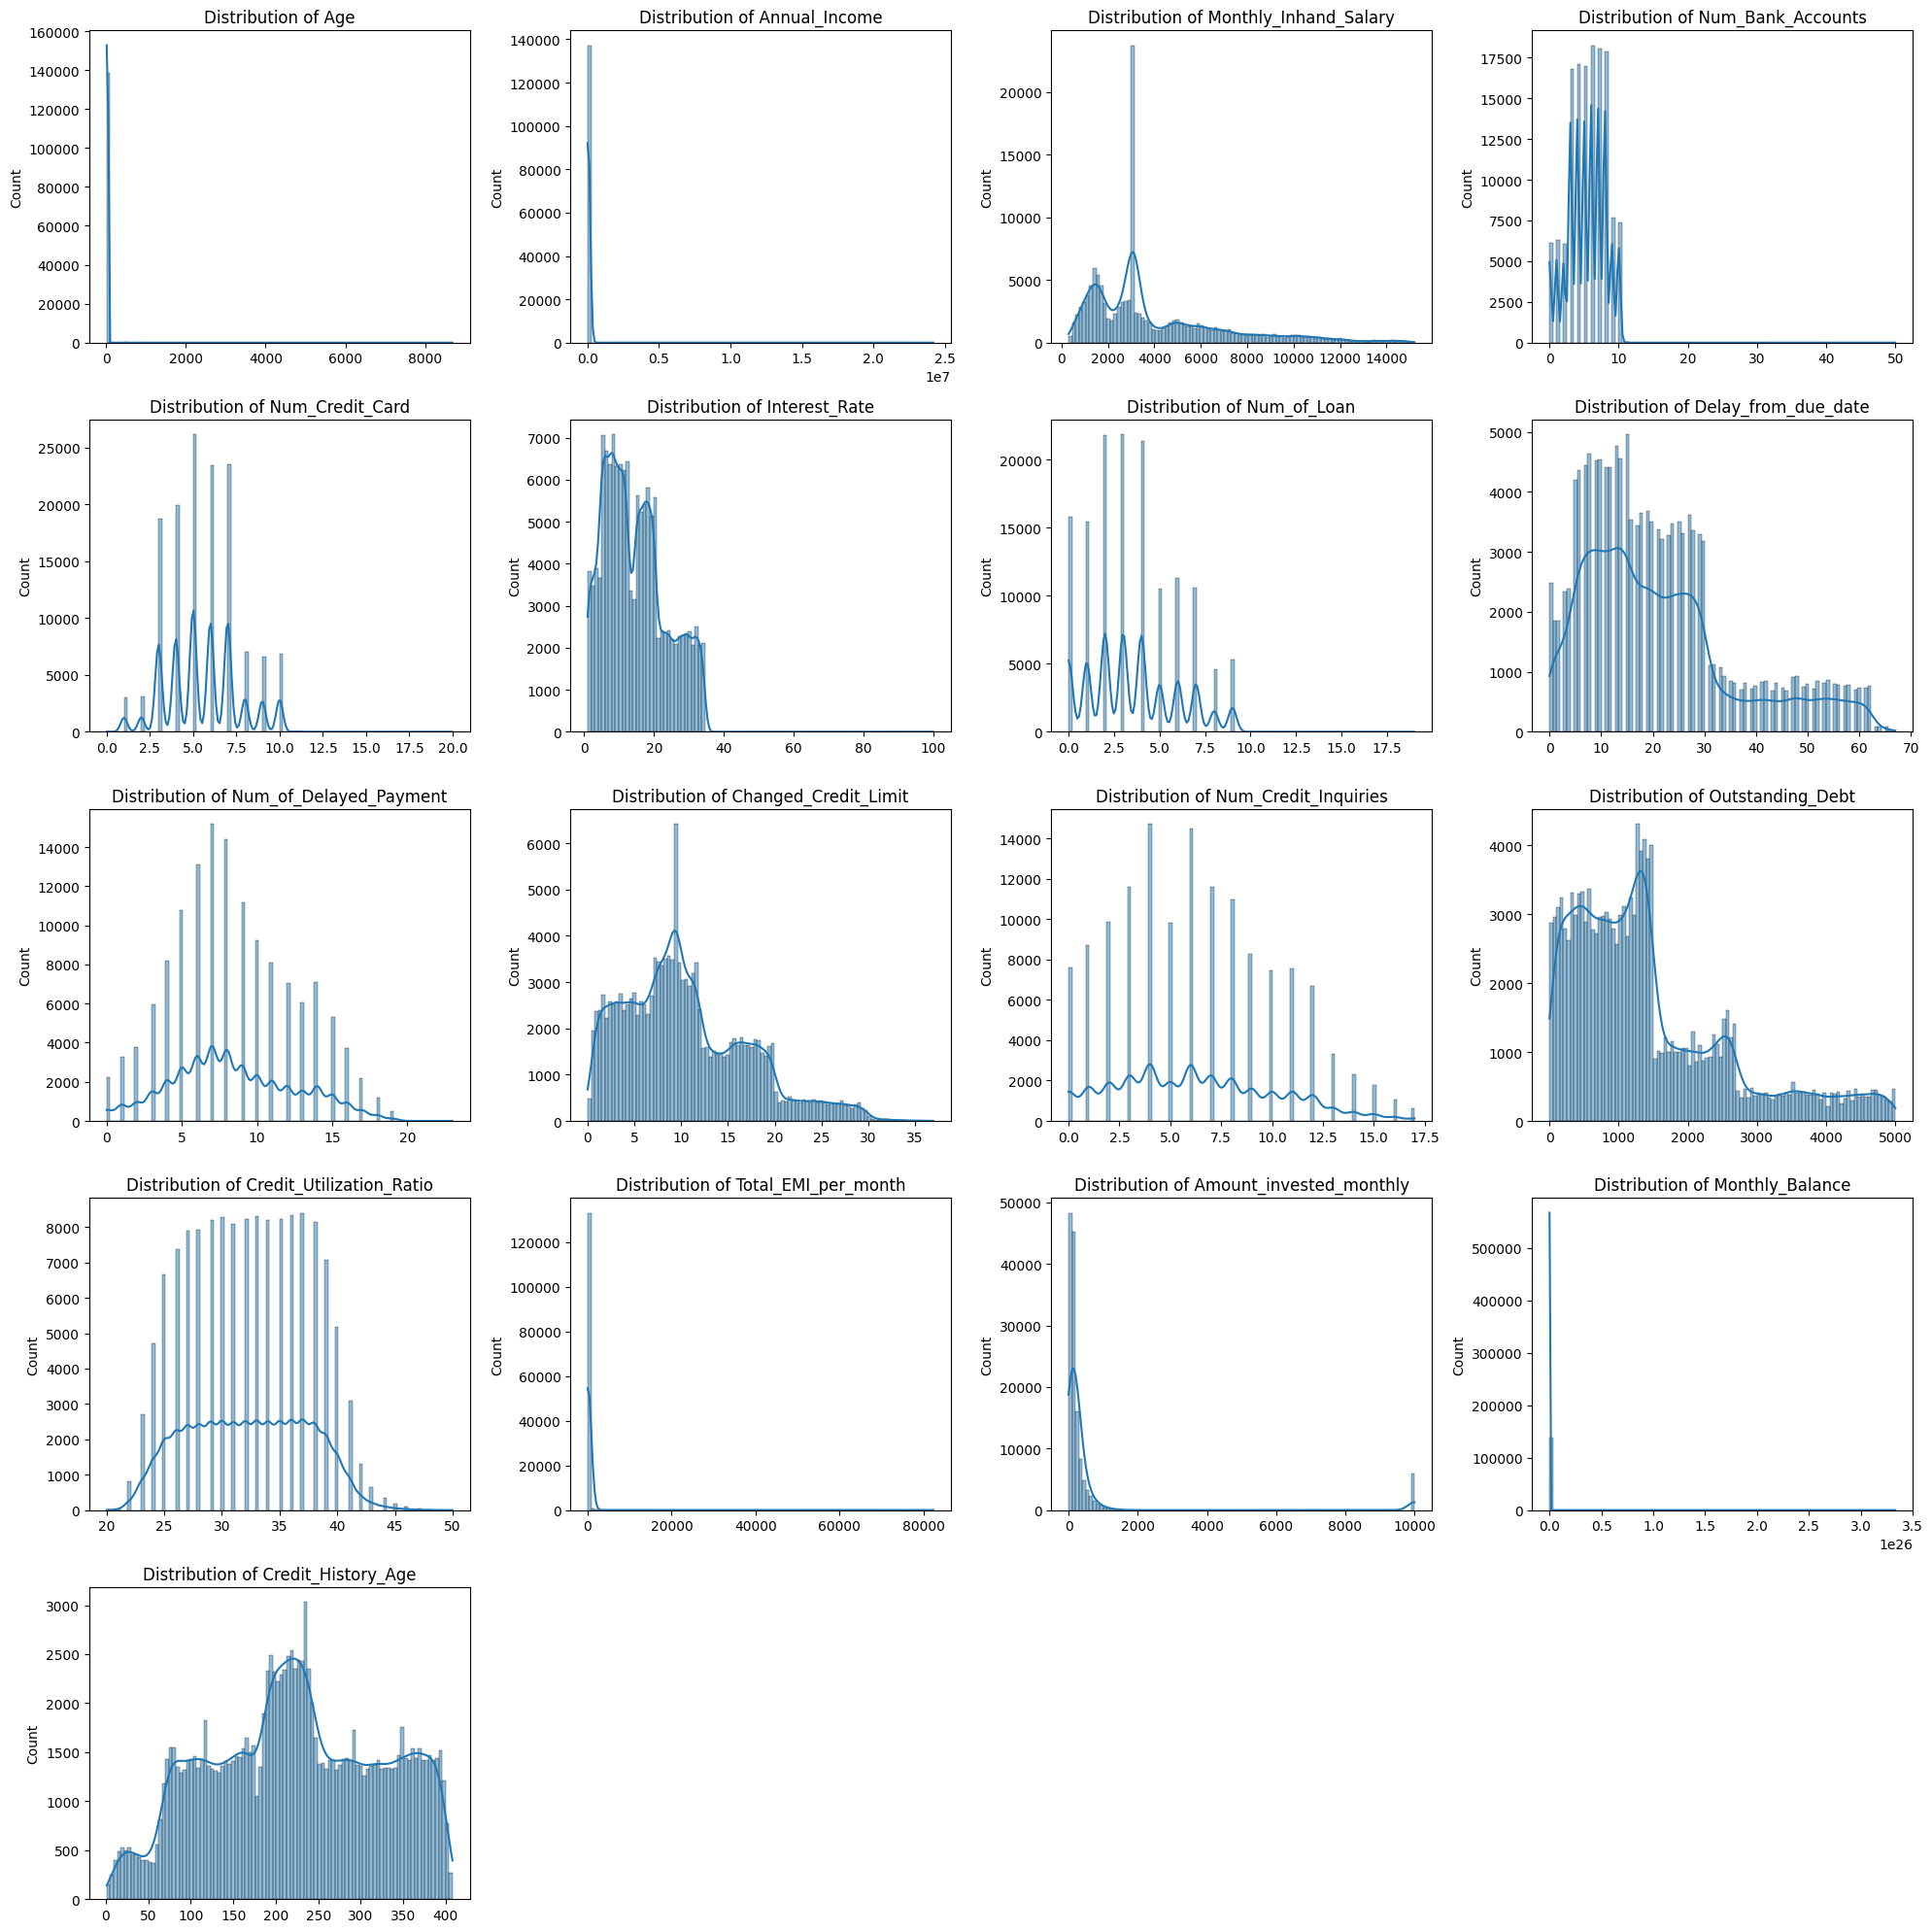

In [ ]:
def plot_numeric_histograms(df, numeric_columns, rows=2, cols=3, bins=50):
    """
    Efficiently plots histograms with KDE (Kernel Density Estimate) for numeric columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - numeric_columns (list): List of numeric column names to plot.
    - rows (int): Number of rows in the subplot grid.
    - cols (int): Number of columns in the subplot grid.
    - bins (int): Number of bins for the histograms (default: 50).

    Returns:
    - Displays a grid of histograms for the specified numeric columns.
    """

    total_plots = min(len(numeric_columns), rows * cols)
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns[:total_plots]):
        sns.histplot(df[col], kde=True, ax=axes[i], bins=bins)
        axes[i].set_title(f"Distribution of {col}")  # Set title
        axes[i].set_xlabel('')

    for j in range(total_plots, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

plot_numeric_histograms(df, num_cols, rows=5, cols=4, bins=100)

### Exploratory Data Analysis: Numeric Feature Distributions

I used a custom function called `plot_numeric_histograms` to visualize the distribution of numeric features in my dataset. The function allowed me to display multiple histograms in a grid layout, with each plot including a Kernel Density Estimate (KDE) to better understand the distribution shape.

#### Function Summary:
The `plot_numeric_histograms(df, numeric_columns, rows, cols, bins)` function:
- Takes in a DataFrame and a list of numeric columns.
- Plots histograms with KDE curves for each column using seaborn.
- Organizes the plots into a clean, scroll-free grid using the specified number of rows and columns.
- Automatically turns off any unused subplots and adjusts spacing for readability.

#### What I Observed:
- **Skewed Data**: Columns like `Annual_Income`, `Monthly_Inhand_Salary`, `Amount_invested_monthly`, and `Total_EM_per_month` are heavily right-skewed, indicating that most values are concentrated at the lower end with a few very high outliers.
- **Step-like Distributions**: Variables such as `Num_Credit_Card`, `Num_of_Loan`, and `Changed_Credit_Limit` showed clear peaks at regular intervals, which suggests they are discrete or semi-discrete in nature.
- **Outliers**: A few features like `Monthly_Balance` and `Annual_Income` displayed extreme values that might need to be handled before modeling to avoid distortion.
- **Interesting Patterns**: I noticed more uniform or even bimodal distributions in variables like `Credit_History_Age` and `Interest_Rate`, which could impact how I interpret and use them in modeling.

These visualizations helped me get a clearer picture of the data quality, distribution shapes, and which columns might need transformation or outlier treatment in the preprocessing steps.


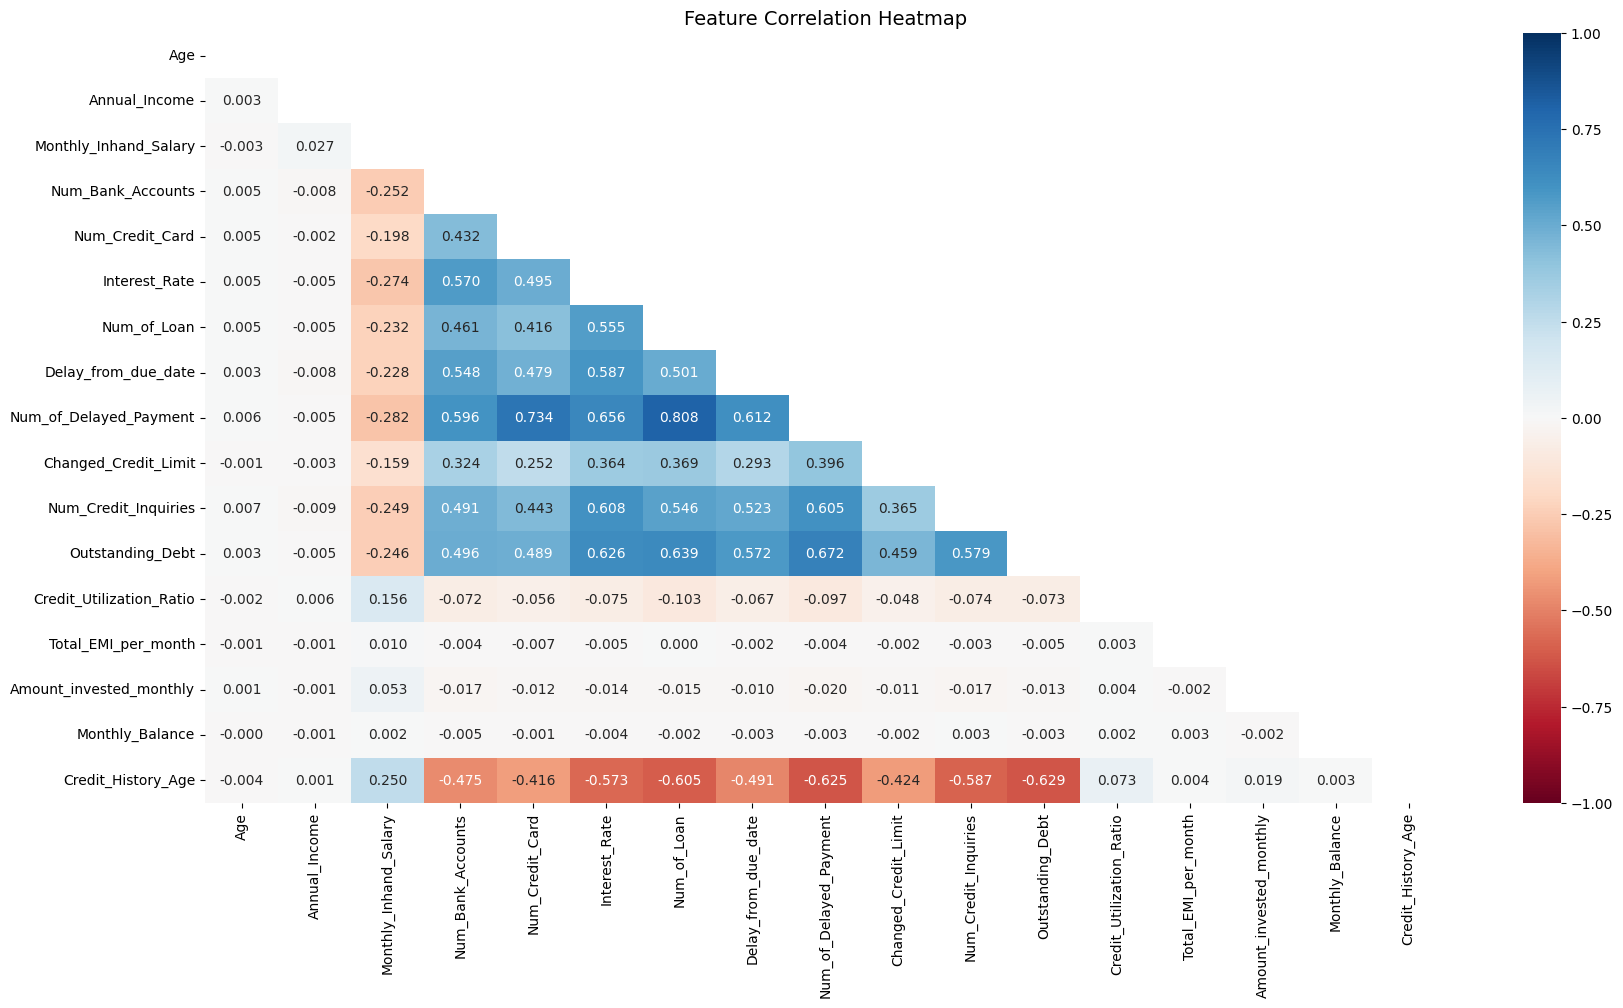

In [ ]:
def plot_correlation_matrix(df, numeric_columns, figsize=(12, 6), cmap="RdBu"):
    """
    Plots a heatmap of the correlation matrix for numeric columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - numeric_columns (list): List of numeric column names.
    - figsize (tuple): Figure size (default: (12,6)).
    - cmap (str): Color map for heatmap visualization (default: "RdBu").

    Returns:
    - Displays the correlation matrix as a heatmap.
    """

    # Compute correlation matrix for numeric features
    correlation_matrix = df[numeric_columns].corr()

    upper_triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Set figure size
    plt.figure(figsize=figsize)

    # Plot the heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,
        mask=upper_triangle_mask,
        fmt=".3f",
        annot_kws={"fontsize": 10},
        cmap=cmap,
        vmin=-1,
        vmax=1
    )

    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

plot_correlation_matrix(df, num_cols, figsize=(20, 10), cmap="RdBu")


### Correlation Analysis: Numeric Features

To explore the linear relationships between numeric variables, I used the `plot_correlation_matrix` function to generate a heatmap of Pearson correlation coefficients. This helped me identify patterns, multicollinearity, and potential feature interactions.

#### Function Summary:
The `plot_correlation_matrix(df, numeric_columns, figsize, cmap)` function:
- Calculates the correlation matrix for the selected numeric columns.
- Uses seaborn’s heatmap to visualize the upper triangle of the matrix, avoiding redundant mirrored values.
- Annotates each cell with the actual correlation value (formatted to 3 decimal places).
- Applies the "RdBu" color palette, where deep blue indicates strong positive correlation and dark red represents strong negative correlation.

#### What I Learned from the Heatmap:
- **Strong Positive Correlations**:
  - `Num_of_Delayed_Payment` was highly correlated with `Num_Credit_Inquiries` (0.608), `Outstanding_Debt` (0.626), and `Num_of_Loan` (0.555), suggesting that delayed payments might be tied to a higher volume of loans and credit activity.
  - `Delay_from_due_date`, `Interest_Rate`, and `Num_Credit_Card` also clustered positively with payment-related variables.

- **Strong Negative Correlations**:
  - `Credit_History_Age` showed significant negative correlations with many features, including `Num_of_Loan` (-0.605), `Interest_Rate` (-0.573), and `Outstanding_Debt` (-0.629). This implies that individuals with a longer credit history may tend to have fewer active loans and lower debt burdens.
  
- **Weak or No Correlation**:
  - Features like `Age`, `Annual_Income`, and `Total_EM_per_month` had minimal correlation with most other variables, indicating independence or nonlinear relationships that wouldn’t be captured by Pearson correlation.

This heatmap was useful in identifying potential multicollinearity issues and in prioritizing features for further modeling and feature engineering.


In [ ]:
def plot_boxplots(df, numeric_features, target_variable, figsize=(18, 14), dpi=300):
    """
    Generates boxplots for numeric features against a categorical target variable.
    """

    df_copy = df.copy()
    df_copy.reset_index(drop=True, inplace=True)

    num_features = len(numeric_features)
    num_rows = (num_features + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize, dpi=dpi)
    axes = axes.flatten()

    matplotlib.rc(("xtick", "ytick", "text"), c="k")
    matplotlib.rc("figure", dpi=80)

    for idx, feature in enumerate(numeric_features):
        try:
            sns.boxplot(
                data=df_copy,
                x=target_variable,
                y=feature,
                ax=axes[idx],
                width=0.8,
                palette="Set2"
            )
            axes[idx].set_title(feature, fontsize=10)
            axes[idx].tick_params(axis='x', rotation=0)
        except Exception as e:
            print(f"Error plotting '{feature}': {e}")
            axes[idx].set_visible(False)

    # Hide any unused subplots
    for i in range(len(numeric_features), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(pad=0.3)
    plt.show()


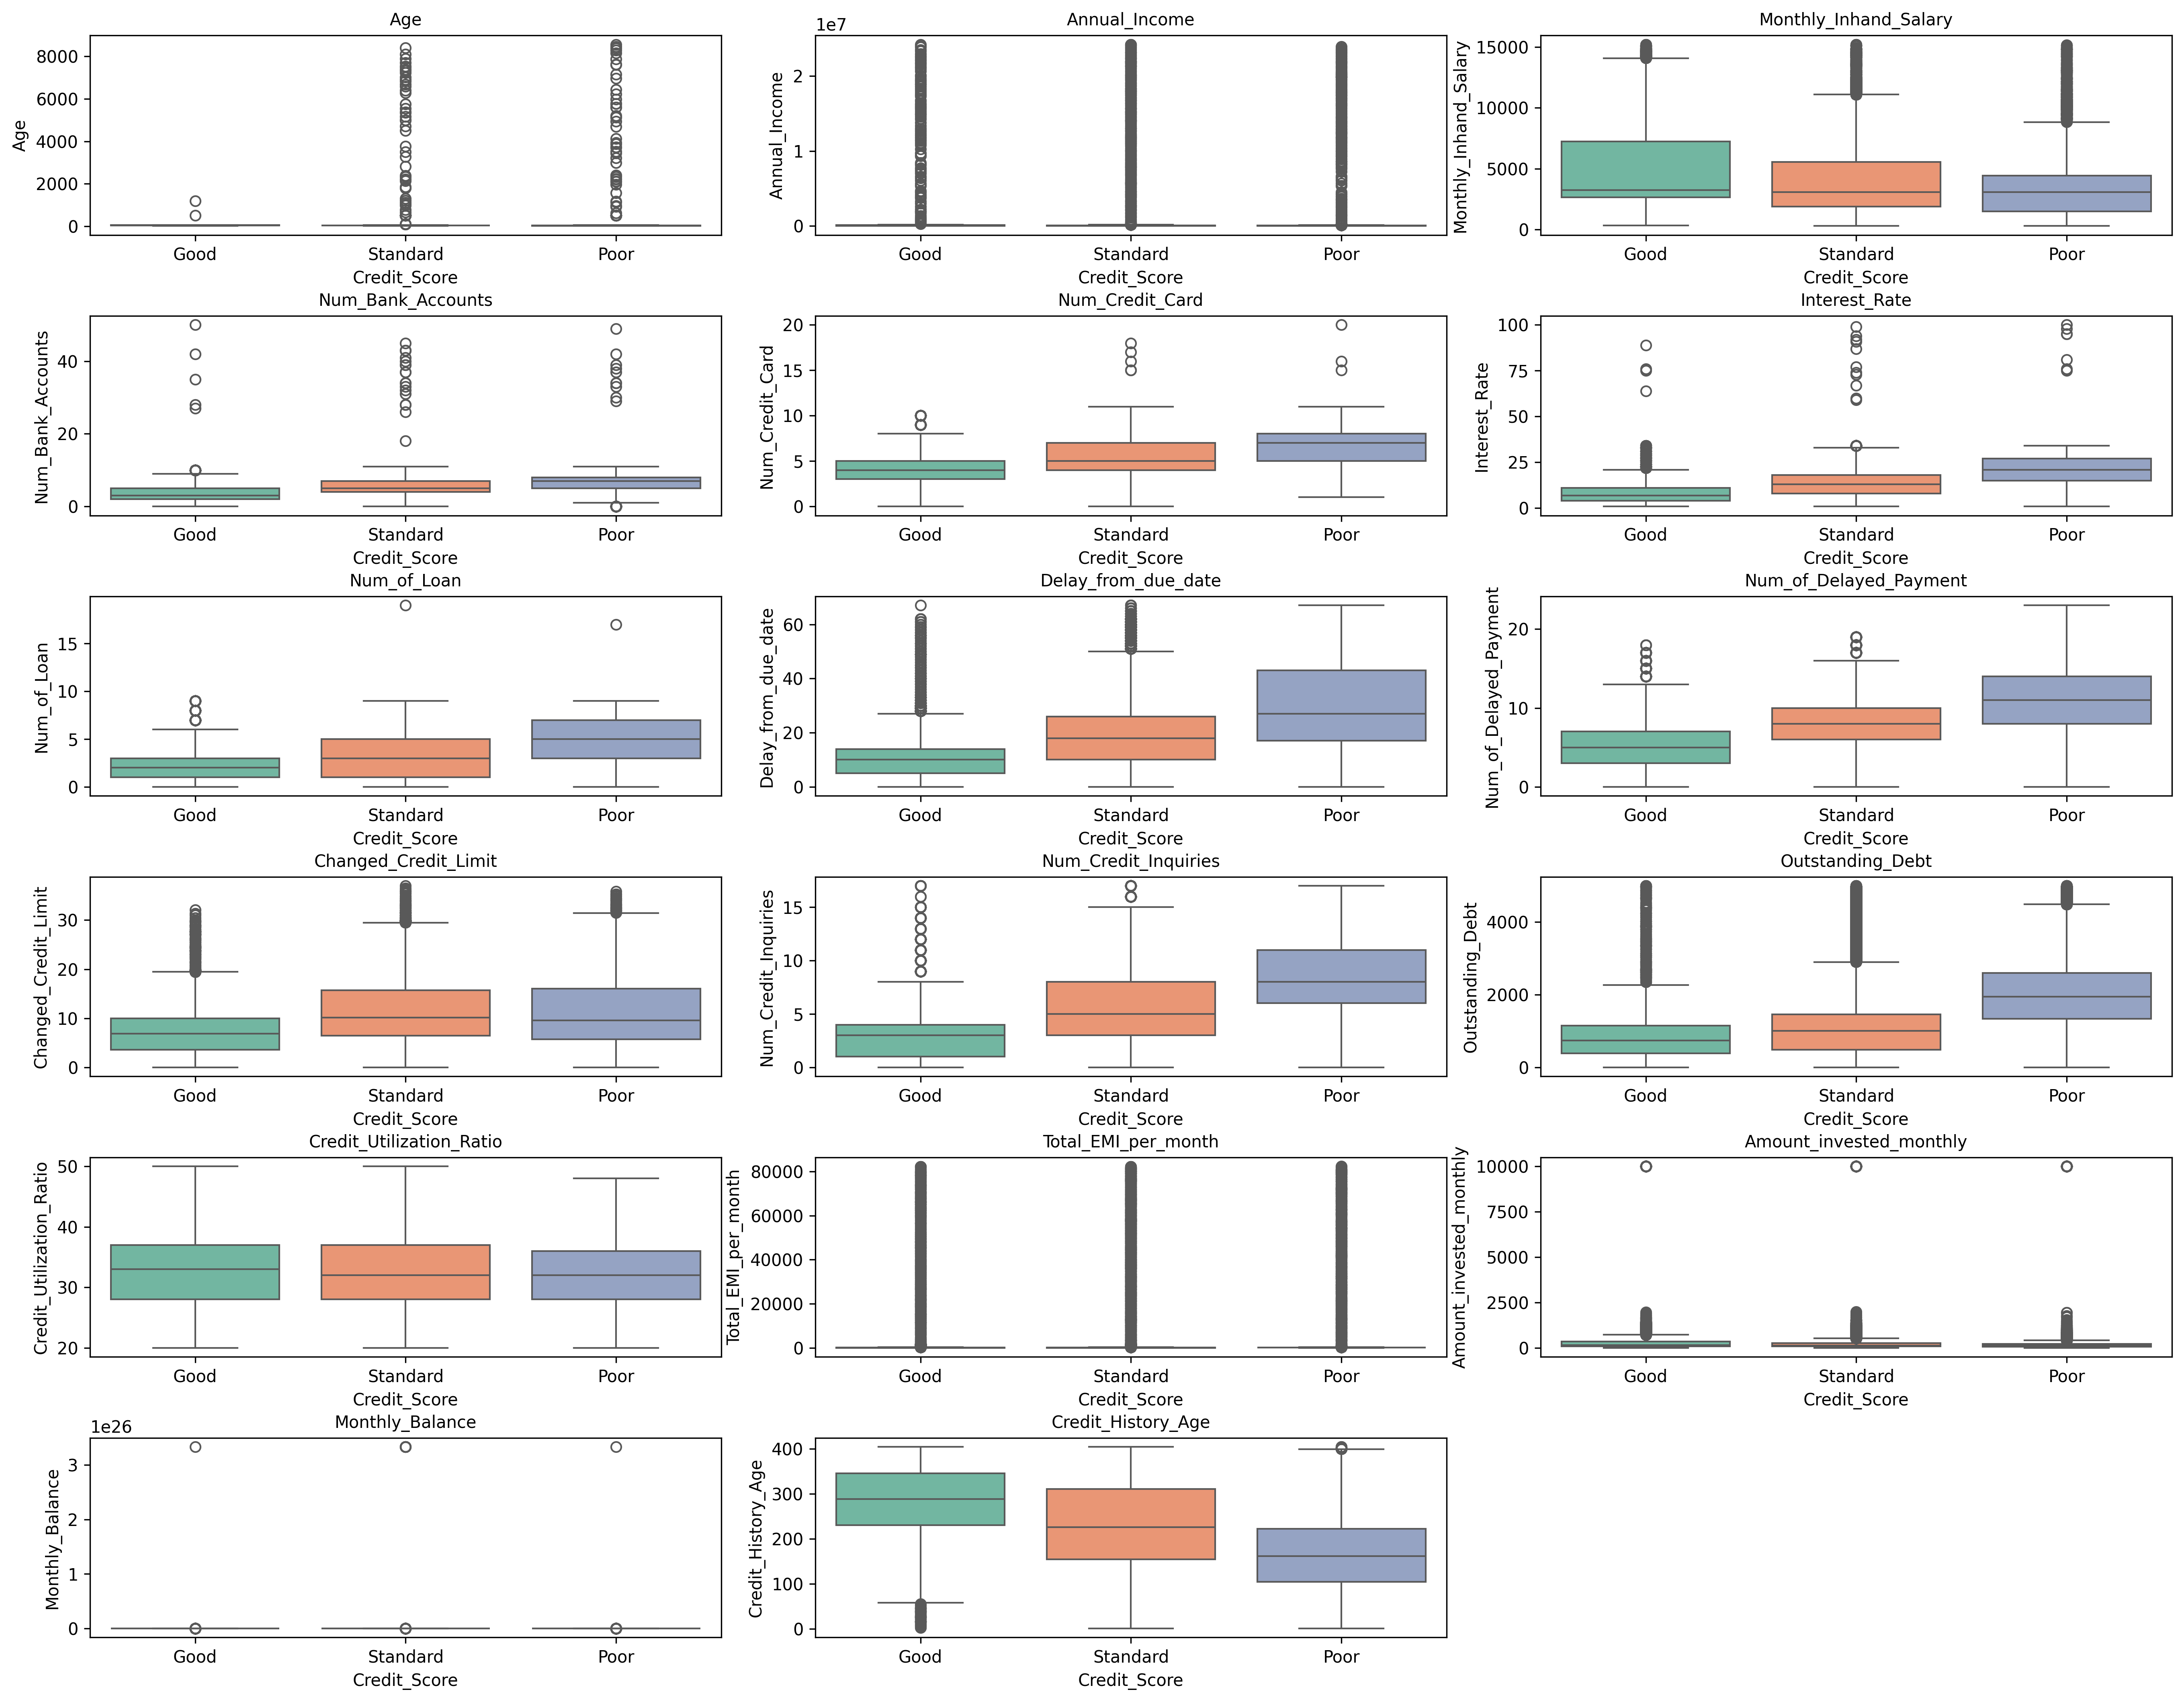

In [ ]:
plot_boxplots(df, num_cols, 'Credit_Score', figsize=(18, 14), dpi=300)

### Boxplot Analysis: Numeric Features vs. Credit Score

To explore how numeric features differ across credit score categories (`Good`, `Standard`, and `Poor`), I used the `plot_boxplots` function to generate a grid of boxplots. This gave me a visual sense of the distribution, central tendency, and outliers for each numeric feature when grouped by the target variable `Credit_Score`.

#### Function Summary:
The `plot_boxplots(df, numeric_features, target_variable)` function:
- Plots each numeric feature against a categorical target using seaborn boxplots.
- Groups the plots in a clean grid layout, automatically adjusting the number of rows based on how many features are passed.
- Uses color (from the `Set2` palette) to differentiate between categories.
- Suppresses the legend for clarity and tightens the layout to minimize whitespace.

#### Insights from the Visuals:
- **Lower Credit Scores Tend to Associate With Higher Risk Indicators**:
  - I noticed that individuals in the "Poor" credit score group often had higher medians and more outliers in key features such as `Interest_Rate`, `Num_of_Loan`, `Num_Credit_Inquiries`, `Delay_from_due_date`, and `Outstanding_Debt`.
  - The `Num_of_Delayed_Payment` boxplot also showed a visible increase from "Good" to "Poor" categories.

- **Inverse Patterns in Favorable Indicators**:
  - Features like `Credit_History_Age` and `Monthly_Inhand_Salary` trended lower in the "Poor" group, while higher values were more common in the "Good" group. This aligns with financial behavior expectations—longer history and better income support stronger credit scores.

- **Outliers Across All Groups**:
  - Features like `Annual_Income`, `Total_EMI_per_month`, and `Monthly_Balance` had significant outliers across all credit categories. This suggests that while income may be high for some, it doesn't always correspond with better credit standing—possibly due to debt, delayed payments, or utilization issues.

------------

One of the most telling patterns I observed was in the `Num_of_Delayed_Payment` boxplot. As I moved from the "Good" to the "Poor" credit score category, the median number of delayed payments clearly increased.

- For individuals with a **"Good"** credit score, the median number of delayed payments was relatively low, and the interquartile range (IQR) was narrow, indicating consistency in timely payments among this group.
- In the **"Standard"** credit score group, the median shifted slightly upward, with a wider spread, suggesting more variability in payment behavior.
- The **"Poor"** credit group had the highest median and the most dispersed distribution, with many outliers extending even higher. This implies that delayed payments were both more frequent and more extreme among individuals with poor credit scores.

## Analysis and Cleaning of Categorical Features


Analysis of Feature: Occupation
Unique Values Count: 6
Unique Values: ['STEM' 'Education & Media' 'Self-Employed' 'Business & Finance'
 'Creative & Arts' 'Healthcare']

Value Distribution:
Occupation
STEM                  28132
Business & Finance    28087
Creative & Arts       27599
Education & Media     27017
Self-Employed         18658
Healthcare             9107
Name: count, dtype: int64


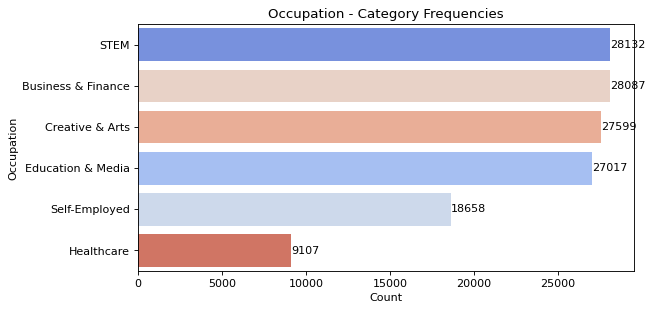



Analysis of Feature: Credit_Mix
Unique Values Count: 4
Unique Values: ['_' 'Good' 'Standard' 'Bad']

Value Distribution:
Credit_Mix
Standard    50677
Good        33781
_           27777
Bad         26365
Name: count, dtype: int64


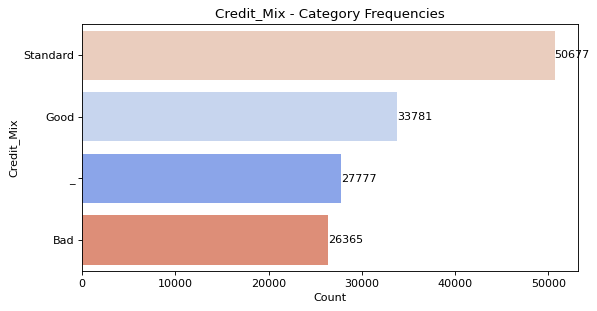



Analysis of Feature: Spending_Habit
Unique Values Count: 2
Unique Values: ['High' 'Low']

Value Distribution:
Spending_Habit
Low     74582
High    64018
Name: count, dtype: int64


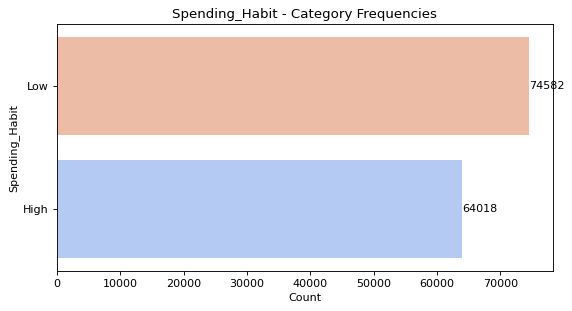



Analysis of Feature: Payment_Size
Unique Values Count: 3
Unique Values: ['Small' 'Large' 'Medium']

Value Distribution:
Payment_Size
Small     55198
Medium    47160
Large     36242
Name: count, dtype: int64


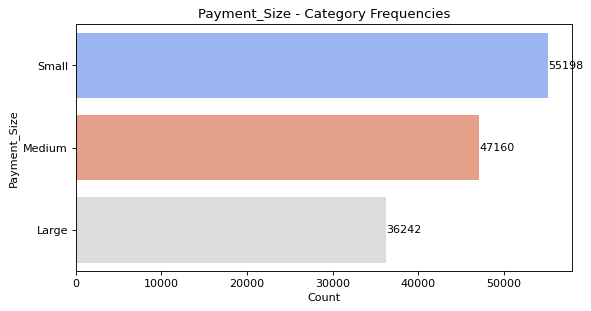



Analysis of Feature: Payment_of_Min_Amount
Unique Values Count: 3
Unique Values: ['No' 'NM' 'Yes']

Value Distribution:
Payment_of_Min_Amount
Yes    72531
No     49420
NM     16649
Name: count, dtype: int64


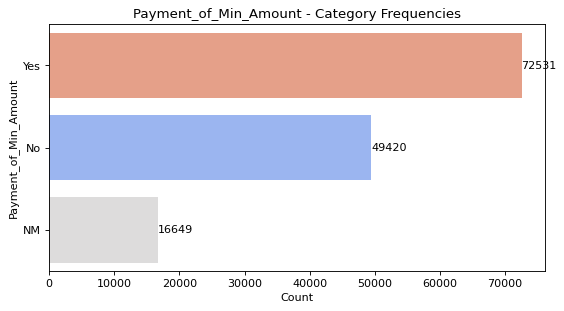



Analysis of Feature: Simulated_Race
Unique Values Count: 4
Unique Values: [np.str_('Hispanic') np.str_('Asian') np.str_('White') np.str_('Black')]

Value Distribution:
Simulated_Race
Black       48506
Hispanic    48454
White       34817
Asian        6823
Name: count, dtype: int64


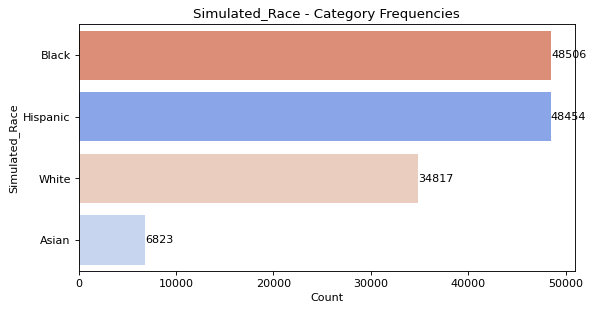

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

def explore_categorical_features(df, categorical_features, show_plots=True):
    """
    Analyzes and visualizes categorical columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing categorical data.
    - categorical_features (list): List of categorical column names.
    - show_plots (bool): Whether to display plots (default: True).

    Returns:
    - Prints unique values, value counts, and generates count plots if enabled.
    """

    for feature in categorical_features:
        print("\n" + "="*50)
        print(f"Analysis of Feature: {feature}")
        print("="*50)

        unique_count = df[feature].nunique()
        print(f"Unique Values Count: {unique_count}")
        print(f"Unique Values: {df[feature].unique()}")

        print("\nValue Distribution:")
        print(df[feature].value_counts())

        # Plot categorical distributions
        if show_plots:
            plt.figure(figsize=(8, 4))
            ax = sns.countplot(
                y=df[feature],
                order=df[feature].value_counts().index,
                hue=df[feature],
                legend=False,
                palette="coolwarm"
            )

            for p in ax.patches:
                ax.annotate(f'{p.get_width():.0f}',
                            (p.get_width() + 3, p.get_y() + p.get_height() / 2),
                            ha='left', va='center', fontsize=10, color='black')

            plt.title(f"{feature} - Category Frequencies", fontsize=12)
            plt.xlabel("Count")
            plt.ylabel(feature)
            plt.show()

        print("="*50, "\n")

explore_categorical_features(df, cat_cols, show_plots=True)

### Categorical Feature Exploration Before Cleaning

To better understand the structure and balance of my categorical variables, I used a custom function called `explore_categorical_features`. This function helped me inspect unique values, their frequencies, and visualize the distribution of categories using count plots.

#### Function Summary:
The `explore_categorical_features(df, categorical_features)` function:
- Prints out the number of unique categories for each feature.
- Displays the unique values and their frequency distribution.
- Optionally generates horizontal count plots with value annotations for clear visual interpretation.


#### What I Observed:

- **Occupation**
  - There are 6 unique categories.
  - The most common occupations are **STEM (28,132)** and **Business & Finance (28,087)**.
  - **Healthcare (9,107)** is the least represented, which might be important when assessing sample balance across job sectors.

- **Credit_Mix**
  - There are 4 unique values, including a category labeled `'_'` (27,777 entries).
  - This missing or unknown category will need to be cleaned or imputed.
  - "Standard" and "Good" are the most frequent classes, while "Bad" is slightly less common.

- **Spending_Habit**
  - Only two categories exist: **Low (74,582)** and **High (64,018)**.
  - The balance is relatively even, with slightly more individuals classified as low spenders.

- **Payment_Size**
  - Three categories: **Small**, **Medium**, and **Large**.
  - "Small" payments are the most frequent (55,198), which may suggest that many users either pay minimums or operate within limited budgets.

- **Payment_of_Min_Amount**
  - Three categories: **Yes**, **No**, and **NM** (possibly "Not Mentioned" or "Not Measurable").
  - "Yes" was the most frequent response (72,531), followed by "No" and "NM".
  - The presence of "NM" as a category indicates possible missing or ambiguous entries that I may want to clean before modeling.

This categorical overview helped me identify both well-distributed and imbalanced features, as well as potential data quality issues like placeholder categories (`'_'`, `'NM'`). These insights will guide my preprocessing and encoding strategies.


In [ ]:
# Clean Payment_of_Min_Amount:
# Replace "NM" with NaN in Payment_of_Min_Amount
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)

df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.ffill().bfill())

print(df[['Customer_ID', 'Payment_of_Min_Amount']].tail())

       Customer_ID Payment_of_Min_Amount
149995  CUS_0x8600                   Yes
149996  CUS_0x942c                    No
149997  CUS_0x942c                    No
149998  CUS_0x942c                    No
149999  CUS_0x942c                    No


In [ ]:
# Cleaning Credit_Mix:

# Replace '-' with NaN in the Credit_Mix column
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

# Fill missing values within each borrower group (Customer_ID) using forward and backward fill
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.ffill().bfill())

# Inspect the results
print(df[['Customer_ID', 'Credit_Mix']].head(10))


   Customer_ID Credit_Mix
0    CUS_0xd40       Good
1    CUS_0xd40       Good
2    CUS_0xd40       Good
3    CUS_0xd40       Good
4    CUS_0xd40       Good
6    CUS_0xd40       Good
7    CUS_0xd40       Good
8   CUS_0x21b1       Good
9   CUS_0x21b1       Good
10  CUS_0x21b1       Good


In [ ]:
# after cleaning
explore_categorical_features(df, cat_cols, show_plots=False)


Analysis of Feature: Occupation
Unique Values Count: 6
Unique Values: ['STEM' 'Education & Media' 'Self-Employed' 'Business & Finance'
 'Creative & Arts' 'Healthcare']

Value Distribution:
Occupation
STEM                  28132
Business & Finance    28087
Creative & Arts       27599
Education & Media     27017
Self-Employed         18658
Healthcare             9107
Name: count, dtype: int64


Analysis of Feature: Credit_Mix
Unique Values Count: 3
Unique Values: ['Good' 'Standard' 'Bad']

Value Distribution:
Credit_Mix
Standard    63563
Good        42085
Bad         32952
Name: count, dtype: int64


Analysis of Feature: Spending_Habit
Unique Values Count: 2
Unique Values: ['High' 'Low']

Value Distribution:
Spending_Habit
Low     74582
High    64018
Name: count, dtype: int64


Analysis of Feature: Payment_Size
Unique Values Count: 3
Unique Values: ['Small' 'Large' 'Medium']

Value Distribution:
Payment_Size
Small     55198
Medium    47160
Large     36242
Name: count, dtype: int64


Ana

In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,"138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00","138,600.00"
mean,37.99,"173,436.68","4,023.63",5.38,5.54,14.55,3.53,21.10,8.43,10.45,6.28,"1,426.55",32.28,222.75,"1,439.30",616.51,"36,075,036,075,036,074,049,536.00"
std,157.70,"1,408,227.02","2,957.46",2.65,2.07,8.79,2.45,14.86,4.12,6.60,3.92,"1,155.75",5.12,99.70,"8,425.11","2,003.83","3,467,534,768,182,663,365,787,648.00"
min,14.00,"7,005.93",303.65,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.23,20.00,1.00,0.00,0.00,0.01
25%,25.00,"19,431.83","1,790.96",3.00,4.00,7.00,2.00,10.00,6.00,5.46,3.00,566.08,28.00,146.00,30.89,77.03,270.90
50%,33.00,"37,577.82","3,091.00",5.00,5.00,13.00,3.00,18.00,8.00,9.41,6.00,"1,166.08",32.00,221.00,71.25,135.79,336.82
75%,42.00,"72,817.24","5,364.57",7.00,7.00,20.00,5.00,28.00,11.00,14.65,9.00,"1,948.20",36.00,303.00,166.09,255.41,468.29
max,"8,688.00","24,198,062.00","15,204.63",50.00,20.00,100.00,19.00,67.00,23.00,36.97,17.00,"4,998.07",50.00,408.00,"82,398.00","10,000.00","333,333,333,333,333,314,856,026,112.00"


### DROP COLUMNS NOT NEEDED

In [ ]:
drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month','Type_of_Loan', 'Payment_Behaviour']
df.drop(drop_columns, axis=1, inplace=True)

### Categorical Feature Cleanup: Before vs After

After performing an initial review of my categorical variables, I went back and cleaned the data to address inconsistencies, ambiguous placeholders, and improve overall quality. I then re-ran the `explore_categorical_features` function with visualizations enabled to confirm the updates.

#### Occupation
- **No change** in unique categories or counts.
- The distribution remains well-balanced, with **STEM**, **Business & Finance**, and **Creative & Arts** being the top three.
- Cleaning wasn’t necessary for this field.

#### Credit_Mix
- **Before**: Included an ambiguous `'_'` category with 27,777 records.
- **After**: Cleaned out the `_` values, reducing categories from **4 → 3**.
- This removed noise and ensured only valid credit behavior labels ("Good", "Standard", "Bad") remained. The counts also increased slightly due to remapping.

#### Spending_Habit
- No change in the number of categories.
- **Low** remains the dominant class, but the distribution is still fairly balanced.
- No cleaning required here.

#### Payment_Size
- No structural changes; still contains **Small**, **Medium**, and **Large**.
- Counts remained the same, this feature was already clean and consistent.

#### Payment_of_Min_Amount
- **Before**: Contained three categories — **"Yes"**, **"No"**, and an unclear **"NM"** (16,649 records).
- **After**: Removed the `"NM"` category entirely, reducing the count of categories from **3 → 2**.
- Final values now only include **"Yes" (82,377)** and **"No" (56,223)** — which is much cleaner and easier to interpret for modeling.

---

### Summary of Cleaning Impact:
| Feature                | Before (# Categories) | After (# Categories) | Key Fix                                 |
|------------------------|-----------------------|----------------------|------------------------------------------|
| `Occupation`           | 6                     | 6                    | No changes needed                        |
| `Credit_Mix`           | 4 (`_` included)      | 3                    | Removed ambiguous `_` category           |
| `Spending_Habit`       | 2                     | 2                    | No changes needed                        |
| `Payment_Size`         | 3                     | 3                    | No changes needed                        |
| `Payment_of_Min_Amount`| 3 (`NM` included)     | 2                    | Removed "NM" (ambiguous) category        |

Cleaning these features improved the reliability of categorical data and prepared them for encoding and downstream modeling. Now the categories are interpretable, complete, and free of placeholders or junk values.


## DETERMINE WHICH FEATURES TO USE IN MODEL

The chi_2_test function is designed to assess the statistical significance of categorical and numerical variables in relation to Credit_Score through hypothesis testing.

Purpose:
This function extracts relevant features from the dataset and applies statistical tests to determine their impact on Credit_Score.

Chi-Square Test: Used for categorical variables to test their independence from Credit_Score.

F-Test (ANOVA): Evaluates whether numerical features significantly contribute to variations in Credit_Score.

How It Works:
The function filters out non-relevant data, initializes a results array, and iteratively applies Chi-Square and F-tests to categorical and numerical variables, respectively. It then returns test statistics and p-values, highlighting the most influential features.

In [ ]:
def hypothesis_testing(df, num_cols, cat_cols, target_col):
    """
    Performs Chi-Square test for categorical variables and F-Test (ANOVA) for numerical variables
    to determine their significance in predicting the target variable.

    Parameters:
    - df (pd.DataFrame): The dataset containing both categorical and numerical features.
    - num_cols (list): List of numerical feature column names.
    - cat_cols (list): List of categorical feature column names.
    - target_col (list): List containing the target column name.

    Returns:
    - pd.DataFrame: A DataFrame containing feature names, test types, test statistics, and p-values.
    """

    results = []
    target_variable = target_col[0]

    # Chi-Square Test for Categorical Features
    for feature in cat_cols:
        contingency_table = pd.crosstab(df[feature], df[target_variable])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        results.append((feature, "Chi-Square", chi2_stat, p_value))

    # F-Test (ANOVA) for Numerical Features
    for feature in num_cols:
        unique_classes = df[target_variable].nunique()
        if unique_classes > 1:
            groups = [df[df[target_variable] == category][feature].dropna()
                  for category in df[target_variable].unique()]

            valid_groups = [g for g in groups if len(g) > 1 and g.nunique() > 1]

            if len(valid_groups) >= 2:
              try:
                f_stat, p_value = f_oneway(*valid_groups)
              except:
                f_stat, p_value = np.nan, np.nan
            else:
                f_stat, p_value = np.nan, np.nan

            results.append((feature, "F-Test", f_stat, p_value))


    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=["Feature", "Test Type", "Test Statistic", "P-Value"])

    return results_df.sort_values("P-Value")

def chi_2_test(df: pd.DataFrame, cat_cols: list, num_cols: list):
    """
    Performs Chi-Square test for categorical variables and F-Test for numerical variables using sklearn's f_classif.

    Parameters:
    - df (pd.DataFrame): The dataset containing categorical and numerical features.
    - cat_cols (list): List of categorical feature column names.
    - num_cols (list): List of numerical feature column names.

    Returns:
    - pd.DataFrame: A DataFrame containing feature names, test statistics, and p-values.
    """

    # Filter training data
    df_copy = df.loc[df["is_train"]].copy()

    # Prepare storage for results
    summary = np.empty((len(cat_cols) + len(num_cols), 3), dtype="object")
    y, *_ = df_copy["Credit_Score"].factorize(sort=False)

    def perform_test(cols, test):
        if test == "chi2":
            for i, col in enumerate(cols):
                cross = pd.crosstab(index=df_copy[col], columns=[df_copy["Credit_Score"]])
                t_stat, p_value, *_ = chi2_contingency(cross)
                summary[i, :] = [col, t_stat, p_value]

        elif test == "f_classif":
            for i, col in enumerate(cols, start=len(cat_cols)):
                t_stat, p_value = f_classif(df_copy[[col]], y.reshape(-1, 1))
                summary[i, :] = [col, t_stat[0], p_value[0]]

    # Perform Chi-square test for categorical columns
    perform_test(cat_cols, test="chi2")

    # Perform F-test for numerical columns
    perform_test(num_cols, test="f_classif")

    # Convert results to DataFrame
    chi2_results_df = pd.DataFrame(data=summary, columns=["Feature", 'Test Statistic', "P-Value"])

    return chi2_results_df.sort_values(by="Test Statistic", ascending=False)


hypothesis_results = hypothesis_testing(df, num_cols, cat_cols, target_col)
chi2_summary = chi_2_test(df, cat_cols, num_cols).sort_values(by="Test Statistic", ascending=False)

# Merge both results
final_results = pd.concat([hypothesis_results, chi2_summary], axis=0).drop_duplicates().reset_index(drop=True)



In [ ]:
# Display hypothesis test results
print("Hypothesis Testing Results:")
display(hypothesis_results.style.bar("Test Statistic").background_gradient("Blues", subset="Test Statistic"))

# Display Chi-Square & F-Test results
print("\nChi-Square & F-Test Results:")
display(chi2_summary.style.bar("Test Statistic").background_gradient("Blues", subset="Test Statistic"))

Hypothesis Testing Results:


,Feature,Test Type,Test Statistic,P-Value
1,Credit_Mix,Chi-Square,37301.479856,0.000000
4,Payment_of_Min_Amount,Chi-Square,20658.020716,0.000000
13,Delay_from_due_date,F-Test,10577.276207,0.000000
12,Num_of_Loan,F-Test,6806.679782,0.000000
11,Interest_Rate,F-Test,13996.422715,0.000000
10,Num_Credit_Card,F-Test,8942.104675,0.000000
9,Num_Bank_Accounts,F-Test,8051.762440,0.000000
8,Monthly_Inhand_Salary,F-Test,1748.737044,0.000000
14,Num_of_Delayed_Payment,F-Test,11691.716984,0.000000
15,Changed_Credit_Limit,F-Test,2421.375117,0.000000



Chi-Square & F-Test Results:


,Feature,Test Statistic,P-Value
1,Credit_Mix,37301.479856,0.000000
4,Payment_of_Min_Amount,20658.020716,0.000000
11,Interest_Rate,13996.422715,0.000000
14,Num_of_Delayed_Payment,11691.716984,0.000000
16,Num_Credit_Inquiries,10645.463877,0.000000
13,Delay_from_due_date,10577.276207,0.000000
10,Num_Credit_Card,8942.104675,0.000000
17,Outstanding_Debt,8374.883204,0.000000
22,Credit_History_Age,8182.506431,0.000000
9,Num_Bank_Accounts,8051.762440,0.000000


### Hypothesis Testing for Feature Selection

To identify which features are statistically significant predictors of `Credit_Score`, I used two approaches:

#### 1. `hypothesis_testing()` Function
- Applied a Chi-Square Test to all categorical variables to measure dependence between each feature and `Credit_Score`.
- Applied an F-Test (ANOVA) to all numerical variables to determine whether mean values significantly differ across credit score categories.

#### 2. `chi_2_test()` Function
- Used sklearn’s `f_classif` for numerical features and Chi-Square for categorical ones.
- Specifically filtered training data (`df["is_train"] == True`) to ensure feature importance was measured only on learnable data.

---

### Key Findings from the Tests

The following features had low p-values (typically < 0.05) and high test statistics, indicating strong statistical significance:
These features show the strongest relationship with Credit Score and should be retained in the model:

#### Categorical Features (Chi-Square Test)

| Feature                 | Test Statistic | P-Value  | Notes                                      |
|-------------------------|----------------|----------|---------------------------------------------|
| Credit_Mix              | 37301.48       | 0.000000 | Strongest categorical predictor             |
| Payment_of_Min_Amount   | 20658.02       | 0.000000 | Highly significant                          |
| Spending_Habit          |   907.10       | 0.000000 | Important behavioral indicator              |
| Payment_Size            |   799.79       | 0.000000 | Moderate significance                       |
| Occupation              |    67.63       | 0.000000 | Statistically significant, but relatively weak |

#### Numerical Features (F-Test)

| Feature                   | Test Statistic | P-Value  | Notes                                        |
|---------------------------|----------------|----------|-----------------------------------------------|
| Interest_Rate             | 13996.42       | 0.000000 | One of the strongest numerical predictors     |
| Num_of_Delayed_Payment    | 11691.72       | 0.000000 | Strongly correlated with lower credit scores  |
| Num_Credit_Inquiries      | 10645.46       | 0.000000 | Indicates risky credit behavior               |
| Delay_from_due_date       | 10577.28       | 0.000000 | Highlights payment reliability                |
| Num_Credit_Card           |  8942.10       | 0.000000 | Moderately predictive                         |
| Outstanding_Debt          |  8374.88       | 0.000000 | Consistently predictive                       |
| Credit_History_Age        |  8182.51       | 0.000000 | Longer history generally implies better score |
| Monthly_Inhand_Salary     |  1748.74       | 0.000000 | Some impact, though weaker                    |
| Amount_invested_monthly   |     6.48       | 0.001527 | Weak but borderline significant               |
| Annual_Income             |     3.08       | 0.046027 | Weak predictor                                |

Features such as `Age`, `Monthly_Balance`, and `Total_EMI_per_month` had non-significant p-values. These may be excluded from modeling unless further analysis reveals otherwise.

---

### Final Feature Selection for Modeling

Based on the results of these statistical tests and domain relevance, I selected the following features for modeling:

**Categorical Features:**
- Credit_Mix
- Payment_of_Min_Amount
- Spending_Habit
- Payment_Size

**Numerical Features:**
- Interest_Rate
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Delay_from_due_date
- Num_Credit_Card
- Outstanding_Debt
- Credit_History_Age

These features demonstrated the strongest relationships with `Credit_Score` and are expected to enhance model accuracy and interpretability.



In [ ]:
# Dropping insignificant features based on hypothesis test results
insignificant_features = ["Age", "Total_EMI_per_month", "Monthly_Balance"]

# Creating a new dataset without the insignificant features
df = df.drop(columns=insignificant_features)

In [ ]:
# Count missing values in Credit_Score for both train and test datasets
missing_test_values = df[df["is_train"] == False]["Credit_Score"].isna().sum()
missing_train_values = df[df["is_train"] == True]["Credit_Score"].isna().sum()

# Count unique value distribution in Credit_Score for the train dataset
train_value_counts = df[df["is_train"] == True]["Credit_Score"].value_counts()

print("Missing Values in Credit_Score:")
print(f"Test Dataset: {missing_test_values} missing values")
print(f"Train Dataset: {missing_train_values} missing values\n")

print("Distribution of Credit_Score in Training Dataset:")
print(train_value_counts.to_string())


Missing Values in Credit_Score:
Test Dataset: 46200 missing values
Train Dataset: 0 missing values

Distribution of Credit_Score in Training Dataset:
Credit_Score
Standard    49182
Poor        26773
Good        16445


In [ ]:
# Create a copy of the DataFrame
df_fico = df.copy()

# Display info of the new DataFrame
print(df_fico.info())

# Save the modified dataset to a new CSV file
df.to_csv('clean_bankdata.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 138600 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Occupation                138600 non-null  object 
 1   Annual_Income             138600 non-null  float64
 2   Monthly_Inhand_Salary     138600 non-null  float64
 3   Num_Bank_Accounts         138600 non-null  int64  
 4   Num_Credit_Card           138600 non-null  int64  
 5   Interest_Rate             138600 non-null  int64  
 6   Num_of_Loan               138600 non-null  int64  
 7   Delay_from_due_date       138600 non-null  int64  
 8   Num_of_Delayed_Payment    138600 non-null  float64
 9   Changed_Credit_Limit      138600 non-null  float64
 10  Num_Credit_Inquiries      138600 non-null  float64
 11  Credit_Mix                138600 non-null  object 
 12  Outstanding_Debt          138600 non-null  float64
 13  Credit_Utilization_Ratio  138600 non-null  float6

## MODEL PREPARATION

In [ ]:
#  Split dataset into Training, Validation & Test
train_data = df[df['is_train'] == True].drop(columns=['is_train'])
test_data = df[df['is_train'] == False].drop(columns=['is_train'])

# Define Features & Target
X = train_data.drop(columns=['Credit_Score'])
y = train_data['Credit_Score']
X_test = test_data.drop(columns=['Credit_Score'])

sensitive_feature_all = train_data['Simulated_Race']

# Split Training Data into Train & Validation Sets (80% Train, 20% Validation)
X_train, X_val, y_train, y_val, sensitive_train, sensitive_val = train_test_split(
    X, y, sensitive_feature_all, test_size=0.2, random_state=42, stratify=y
)

X_train_raw = X_train.copy()
X_val_raw = X_val.copy()
y_train_raw = y_train.copy()
y_val_raw = y_val.copy()
sensitive_train_raw = sensitive_train.copy()
sensitive_val_raw = sensitive_val.copy()

# Define Encoding Strategy
ordinal_categories = [
    ['Bad', 'Standard', 'Good'],  # Credit_Mix
    ['Low', 'High'],  # Spending_Habit
    ['Small', 'Medium', 'Large']  # Payment_Size
]

num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
one_hot_cols = ["Occupation", "Payment_of_Min_Amount"]
ordinal_cols = ["Credit_Mix", "Spending_Habit", "Payment_Size"]

# Encode the Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Step 4: Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('one_hot_enc', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),  # One-Hot Encoding
        ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), ordinal_cols)  # Ordinal Encoding
    ]
)

# Full Pipeline (Preprocessing + Model)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Print Label Encoding for `Credit_Score`
print("\nLabel Encoding for Credit_Score:")
for index, class_name in enumerate(label_encoder.classes_):
    print(f"Class '{class_name}' is encoded as {index}")

print("\n", df["Credit_Score"].value_counts(),"\n")


df.describe().T


Label Encoding for Credit_Score:
Class 'Good' is encoded as 0
Class 'Poor' is encoded as 1
Class 'Standard' is encoded as 2

 Credit_Score
Standard    49182
Poor        26773
Good        16445
Name: count, dtype: int64 



,count,mean,std,min,25%,50%,75%,max
Annual_Income,"138,600.00","173,436.68","1,408,227.02","7,005.93","19,431.83","37,577.82","72,817.24","24,198,062.00"
Monthly_Inhand_Salary,"138,600.00","4,023.63","2,957.46",303.65,"1,790.96","3,091.00","5,364.57","15,204.63"
Num_Bank_Accounts,"138,600.00",5.38,2.65,0.00,3.00,5.00,7.00,50.00
Num_Credit_Card,"138,600.00",5.54,2.07,0.00,4.00,5.00,7.00,20.00
Interest_Rate,"138,600.00",14.55,8.79,1.00,7.00,13.00,20.00,100.00
Num_of_Loan,"138,600.00",3.53,2.45,0.00,2.00,3.00,5.00,19.00
Delay_from_due_date,"138,600.00",21.10,14.86,0.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,"138,600.00",8.43,4.12,0.00,6.00,8.00,11.00,23.00
Changed_Credit_Limit,"138,600.00",10.45,6.60,0.00,5.46,9.41,14.65,36.97
Num_Credit_Inquiries,"138,600.00",6.28,3.92,0.00,3.00,6.00,9.00,17.00


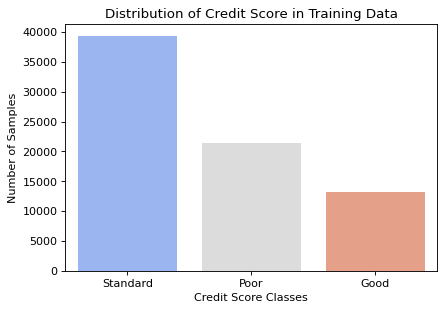

Class Distribution in Training Data:
Credit_Score
Standard    39346
Poor        21418
Good        13156
Name: count, dtype: int64 

The "Good" class (17.8%) has significantly fewer samples compared to "Standard" (53.2%) and "Poor" (29.0%).


In [ ]:
# Check Class Distribution to see if Credit Score class is imbalanced

# Count the occurrences of each class
class_counts = y_train.value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Credit Score Classes")
plt.ylabel("Number of Samples")
plt.title("Distribution of Credit Score in Training Data")
plt.show()

# Print class distribution
print("Class Distribution in Training Data:")
print(class_counts, "\n")

# Calculate total samples
total_samples = class_counts.sum()

# Compute class percentages
class_percentages = {cls: (count / total_samples) * 100 for cls, count in class_counts.items()}

# Print the formatted output
print(f'The "Good" class ({class_percentages["Good"]:.1f}%) has significantly fewer samples compared to '
      f'"Standard" ({class_percentages["Standard"]:.1f}%) and "Poor" ({class_percentages["Poor"]:.1f}%).')


### USING SMOTE
**The dataset is imbalanced, with the "Good" class underrepresented. SMOTE will be used to generate synthetic samples and balance the data for better model performance.
I want to increase the representation of "Good" and "Poor" cases and I plan to train a model that benefits from balanced classes.**

In [ ]:
# Transform features
X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)
X_test_encoded = preprocessor.transform(X_test)

# Print class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train_encoded))

# Apply SMOTE to address class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train_encoded)


# Print class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_balanced))


Class distribution before SMOTE: Counter({np.int64(2): 39346, np.int64(1): 21418, np.int64(0): 13156})
Class distribution after SMOTE: Counter({np.int64(2): 39346, np.int64(1): 39346, np.int64(0): 39346})


### Model Preparation and Preprocessing Summary

Before training the model, I performed several key preparation steps to ensure that the data is clean, structured, and ready for machine learning.

#### 1. Dataset Splitting
- I split the dataset into **training** and **test** sets using the `is_train` flag.
- The training data was further divided into **training (80%)** and **validation (20%)** subsets using `train_test_split`, with stratification on the `Credit_Score` class to preserve class balance during splitting.

#### 2. Feature and Target Setup
- Defined `X` as the feature matrix and `y` as the target (`Credit_Score`).
- Encoded the target labels using `LabelEncoder`, where:
  - `'Good'` is encoded as `0`
  - `'Poor'` is encoded as `1`
  - `'Standard'` is encoded as `2`

#### 3. Encoding Strategy
- **One-Hot Encoding** for nominal categorical variables: `Occupation`, `Payment_of_Min_Amount`.
- **Ordinal Encoding** for logically ordered categories:
  - `Credit_Mix`: ['Bad', 'Standard', 'Good']
  - `Spending_Habit`: ['Low', 'High']
  - `Payment_Size`: ['Small', 'Medium', 'Large']
- **RobustScaler** was applied to numerical features to mitigate the impact of outliers.

#### 4. Preprocessing Pipeline
- A `ColumnTransformer` was defined to manage preprocessing for different feature types.
- This was integrated into a full `Pipeline` for consistent transformation across training, validation, and test sets.

#### 5. Class Imbalance in Target Variable
- Initial class distribution in the training data was imbalanced:
  - `Standard` (encoded as 2): 39,346 samples (53.2%)
  - `Poor` (encoded as 1): 21,418 samples (29.0%)
  - `Good` (encoded as 0): 13,156 samples (17.8%)
- The underrepresentation of the `Good` class posed a risk of biased model predictions.

#### 6. Applying SMOTE for Resampling
To resolve this imbalance, I applied **SMOTE (Synthetic Minority Over-sampling Technique)** to the preprocessed training set:

- SMOTE synthetically oversampled the minority classes (`Good` and `Poor`) to match the majority class (`Standard`).
- Class distribution before and after applying SMOTE:

| Class Label | Category | Before | After  |
|-------------|----------|--------|--------|
| 0           | Good     | 13,156 | 39,346 |
| 1           | Poor     | 21,418 | 39,346 |
| 2           | Standard | 39,346 | 39,346 |

- This resulted in a **perfectly balanced** training dataset: `Counter({2: 39346, 1: 39346, 0: 39346})`

This step was critical in ensuring the model learns to predict each class equally well and does not favor the dominant `Standard` class.

#### 7. Summary Statistics
- Descriptive statistics of numerical features (mean, standard deviation, min, max) were reviewed to support decisions around scaling and identify potential outliers or anomalies.

By including SMOTE in the pipeline, the training set is now balanced, making the model more robust and fair in classifying all levels of credit scores.


## Building Model

### BUILD BASE MODELs


In [ ]:
def evaluate_base_model(model, X_train, y_train, X_val, y_val, sensitive_features=None, model_name="Model"):
    print(f"\nEvaluating: {model_name}")

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Classification metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

    # Confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Fairness audit
    if sensitive_features is not None:
        print("\nFairness Audit:")
        metric_frame = MetricFrame(metrics={"accuracy": accuracy_score},
                                   y_true=y_val,
                                   y_pred=y_pred,
                                   sensitive_features=sensitive_features)
        print("Group-wise Accuracy:")
        print(metric_frame.by_group)

        dp_diff = demographic_parity_difference(y_val, y_pred, sensitive_features=sensitive_features)
        print(f"Demographic Parity Difference: {dp_diff:.4f}")



Evaluating: Logistic Regression
Accuracy: 0.6557
Precision: 0.6996
Recall: 0.6557
F1 Score: 0.6603

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.83      0.61      3289
           1       0.63      0.68      0.65      5355
           2       0.81      0.59      0.68      9836

    accuracy                           0.66     18480
   macro avg       0.64      0.70      0.65     18480
weighted avg       0.70      0.66      0.66     18480



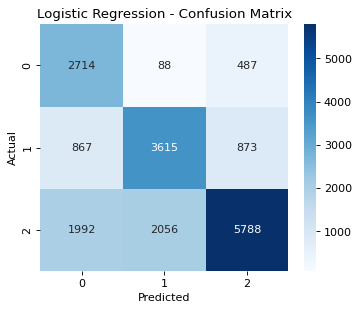


Fairness Audit:
Group-wise Accuracy:
                accuracy
Simulated_Race          
Asian               0.64
Black               0.66
Hispanic            0.66
White               0.65
Demographic Parity Difference: 0.0187

Evaluating: Random Forest
Accuracy: 0.8022
Precision: 0.8053
Recall: 0.8022
F1 Score: 0.8024

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3289
           1       0.78      0.86      0.81      5355
           2       0.84      0.78      0.81      9836

    accuracy                           0.80     18480
   macro avg       0.79      0.81      0.79     18480
weighted avg       0.81      0.80      0.80     18480



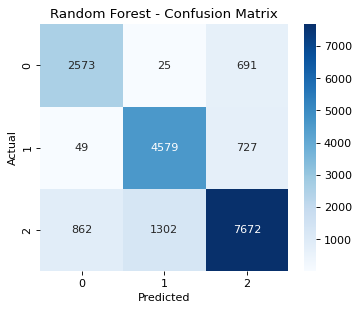


Fairness Audit:
Group-wise Accuracy:
                accuracy
Simulated_Race          
Asian               0.80
Black               0.81
Hispanic            0.80
White               0.80
Demographic Parity Difference: 0.0072

Evaluating: XGBoost
Accuracy: 0.7453
Precision: 0.7513
Recall: 0.7453
F1 Score: 0.7469

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      3289
           1       0.75      0.74      0.75      5355
           2       0.80      0.75      0.77      9836

    accuracy                           0.75     18480
   macro avg       0.72      0.74      0.73     18480
weighted avg       0.75      0.75      0.75     18480



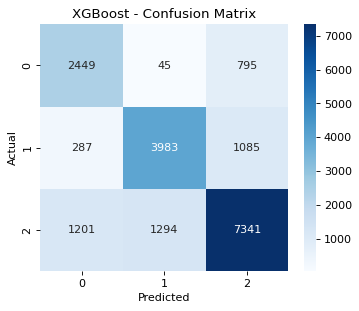


Fairness Audit:
Group-wise Accuracy:
                accuracy
Simulated_Race          
Asian               0.72
Black               0.75
Hispanic            0.75
White               0.74
Demographic Parity Difference: 0.0241


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
evaluate_base_model(
    lr,
    X_train_balanced,            # SMOTE-balanced and preprocessed
    y_train_balanced,
    X_val_encoded,               # Preprocessed validation set
    y_val_encoded,
    sensitive_features=sensitive_val,
    model_name="Logistic Regression"
)

# Random Forest
rf = RandomForestClassifier(random_state=42)
evaluate_base_model(
    rf,
    X_train_balanced,
    y_train_balanced,
    X_val_encoded,
    y_val_encoded,
    sensitive_features=sensitive_val,
    model_name="Random Forest"
)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
evaluate_base_model(
    xgb,
    X_train_balanced,
    y_train_balanced,
    X_val_encoded,
    y_val_encoded,
    sensitive_features=sensitive_val,
    model_name="XGBoost"
)


### DNN Model

In [ ]:
# Define a Deep Neural Network (DNN) architecture
dnn_model = Sequential([

    # Input layer + first hidden layer
    Dense(512, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    # Second hidden layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Third hidden layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Fourth hidden layer
    Dense(64, activation='relu'),
    BatchNormalization(),

    # Fifth hidden layer
    Dense(32, activation='relu'),
    BatchNormalization(),

    # Output layer for 3 credit score classes
    Dense(3, activation='softmax')
])

# Compile the DNN
dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

# Save the best model during training
model_checkpoint = ModelCheckpoint(
    filepath='best_dnn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

# Train the DNN
history = dnn_model.fit(
    x=X_train_balanced,
    y=y_train_balanced,
    validation_data=(X_val_encoded, y_val_encoded),  # Changed this to match your earlier naming
    batch_size=256,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)
# Evaluate & Report
y_pred_probs = dnn_model.predict(X_val_encoded)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_encoded, y_pred))

Epoch 1/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6452 - loss: 0.8555
Epoch 1: val_accuracy improved from -inf to 0.67419, saving model to best_dnn_model.keras
462/462 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.6453 - loss: 0.8554 - val_accuracy: 0.6742 - val_loss: 0.7607
Epoch 2/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7094 - loss: 0.7116
Epoch 2: val_accuracy improved from 0.67419 to 0.67489, saving model to best_dnn_model.keras
462/462 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7094 - loss: 0.7115 - val_accuracy: 0.6749 - val_loss: 0.7430
Epoch 3/100
461/462 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.6940
Epoch 3: val_accuracy did not improve from 0.67489
462/462 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7190 - loss: 0.6940 - val_accuracy: 0.6697 - val_loss: 0.7610
Epoch 4/100
454/462 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7236 - loss: 0.6820
Epoch 4: val_accuracy did not improve from 0.67489
462/462 ━━━━

In [ ]:
# save the best model
dnn_model.save("final_dnn_model.keras")

In [ ]:

best_dnn_model = load_model('best_dnn_model.keras')

In [ ]:
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,851 (2.18 MB)

 Trainable params: 189,955 (742.01 KB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 379,912 (1.45 MB)

### Evaluation Function

In [ ]:
def evaluate_model_performance(model, X_train, y_train, X_val, y_val):
    """
    Evaluates classification model performance on train and validation sets.
    Prints confusion matrices and classification reports.
    """
    print("\n" + "="*60)
    print("MODEL PERFORMANCE EVALUATION")
    print("="*60)

    # Predict class probabilities and convert to class indices
    y_train_pred = model.predict(X_train).argmax(axis=1)
    y_val_pred = model.predict(X_val).argmax(axis=1)

    # Validation results
    print("\nValidation Set")
    print("-" * 60)
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))

    # Training results
    print("\nTraining Set")
    print("-" * 60)
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("\nClassification Report:")
    print(classification_report(y_train, y_train_pred))

    print("="*60)

In [ ]:
evaluate_model_performance(dnn_model, X_train_balanced, y_train_balanced, X_val_encoded, y_val_encoded)


MODEL PERFORMANCE EVALUATION
3689/3689 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Set
------------------------------------------------------------
Confusion Matrix:
[[2710   61  518]
 [ 211 4523  621]
 [1522 1725 6589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      3289
           1       0.72      0.84      0.78      5355
           2       0.85      0.67      0.75      9836

    accuracy                           0.75     18480
   macro avg       0.73      0.78      0.74     18480
weighted avg       0.77      0.75      0.75     18480


Training Set
------------------------------------------------------------
Confusion Matrix:
[[38121   151  1074]
 [  748 36681  1917]
 [ 4937  6293 28116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     39346
           1       0.85      0.93      0

### Without Outliers

In [ ]:
# OUTLIER HANDLING FUNCTIONS

def outlier_bounds(df, col):
    """
    Calculate lower and upper bounds for outlier detection using the IQR method.
    Returns the lower and upper threshold for the given column.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

def remove_outliers(df, cols, verbose=False):
    """
    Removes rows from training data where any given column has values outside the IQR bounds.
    Only affects rows marked with 'is_train' == True.
    If verbose=True, prints number and percentage of rows removed.
    Returns the number of rows removed and original count.
    """
    original_rows = df[df['is_train']].shape[0]
    for col in cols:
        lb, ub = outlier_bounds(df, col)
        df.drop(df[(df['is_train']) & ((df[col] < lb) | (df[col] > ub))].index, inplace=True)
    updated_rows = df[df['is_train']].shape[0]
    rows_removed = original_rows - updated_rows
    if verbose:
        percent_removed = (rows_removed / original_rows) * 100
        print(f"Outlier removal complete: {rows_removed} rows removed ({percent_removed:.2f}%).")
    return rows_removed, original_rows

In [ ]:
# PREPROCESSING FUNCTION

def preprocess_data(df, scaler_type='robust', verbose=False, df_name='dataset', export_clean=False):
    """
    Removes outliers from numeric columns, encodes categorical features,
    scales numeric data, and splits into train/val/test sets.
    Logs outlier removal stats to CSV. Optionally exports cleaned DataFrame.
    Returns features, targets, encoders, and row count info.
    """
    num_cols = df.select_dtypes(exclude='object').columns.tolist()
    num_cols.remove('is_train')

    rows_removed, original_rows = remove_outliers(df, num_cols, verbose=verbose)
    percent_removed = (rows_removed / original_rows) * 100

    log_df = pd.DataFrame({
        'Dataset': [df_name],
        'Original Rows': [original_rows],
        'Removed Rows': [rows_removed],
        'Percent Removed': [round(percent_removed, 2)]
    })
    log_path = "outlier_log.csv"
    log_df.to_csv(log_path, mode='a', index=False, header=not os.path.exists(log_path))

    if export_clean:
        status = "outliers_removed" if rows_removed > 0 else "no_outliers_removed"
        cleaned_path = f"{df_name}_{status}.csv"
        df.to_csv(cleaned_path, index=False)
        if verbose:
            print(f"Cleaned DataFrame exported to: {cleaned_path}")

    train_df = df[df['is_train']].drop(columns=['is_train'])
    test_df = df[~df['is_train']].drop(columns=['is_train'])

    X = train_df.drop(columns=['Credit_Score'])
    y = train_df['Credit_Score']
    X_test = test_df.drop(columns=['Credit_Score'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    label_encoder = LabelEncoder()
    y_train_enc = label_encoder.fit_transform(y_train)
    y_val_enc = label_encoder.transform(y_val)

    one_hot_cols = ["Occupation", "Payment_of_Min_Amount"]
    ordinal_cols = ["Credit_Mix", "Spending_Habit", "Payment_Size"]
    ordinal_categories = [
        ['Bad', 'Standard', 'Good'],
        ['Low', 'High'],
        ['Small', 'Medium', 'Large']
    ]

    scaler = RobustScaler() if scaler_type == 'robust' else MinMaxScaler()

    preprocessor = ColumnTransformer([
        ('num', scaler, num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols)
    ])

    pipeline = Pipeline([('preprocessor', preprocessor)])
    X_train_proc = pipeline.fit_transform(X_train)
    X_val_proc = pipeline.transform(X_val)
    X_test_proc = pipeline.transform(X_test)

    return X_train_proc, X_val_proc, X_test_proc, y_train_enc, y_val_enc, label_encoder, pipeline, rows_removed



In [ ]:
# DIAGNOSTIC VISUALIZATION & METRICS

# Plot a confusion matrix heatmap
def plot_confusion_heatmap(y_true, y_pred, encoder, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    labels = encoder.classes_
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot bar charts of Precision, Recall, and F1 Score for each class

def plot_classification_metrics(y_true, y_pred, encoder):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, zero_division=0)
    labels = encoder.classes_
    metrics_df = pd.DataFrame({
        'Class': labels,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    metrics_df.set_index('Class').plot(kind='bar', figsize=(8, 5), colormap='Set2')
    plt.title("Classification Metrics by Class")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Make class predictions
def threshold_predictions(probabilities, threshold=0.6):
    """
    Returns class predictions if the maximum probability exceeds the threshold.
    Otherwise returns -1 for uncertain predictions, and a mask of valid indices.

    Parameters:
    - probabilities (np.ndarray): Array of class probabilities.
    - threshold (float): Confidence threshold.

    Returns:
    - preds (np.ndarray): Class predictions or -1 for uncertain cases.
    - mask (np.ndarray): Boolean mask for confident predictions.
    """
    max_probs = np.max(probabilities, axis=1)
    preds = np.where(max_probs >= threshold, probabilities.argmax(axis=1), -1)
    mask = preds != -1
    return preds, mask

In [ ]:
# TRAINING FUNCTION WITH EARLY STOPPING AND CHECKPOINTING

def train_model(model, X_train, y_train, X_val, y_val, label='dnn_model', learning_rate=0.001, batch_size=256, epochs=100, patience=15):
    """
    Compiles and trains the DNN model with early stopping and model checkpointing.

    Parameters:
    - model: Keras model to train.
    - X_train, y_train: Training features and labels.
    - X_val, y_val: Validation features and labels.
    - label (str): Filename prefix to save the best model.
    - learning_rate (float): Learning rate for the optimizer.
    - batch_size (int): Batch size for training.
    - epochs (int): Maximum number of training epochs.
    - patience (int): Number of epochs with no improvement before stopping early.

    Returns:
    - history: Keras History object containing training metrics.
    """
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f"{label}.keras", monitor='val_accuracy', save_best_only=True)

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: w for i, w in enumerate(class_weights)}

    model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stopping, checkpoint],
        class_weight=class_weight_dict
    )
    return history

In [ ]:
# PLOT TRAINING HISTORY

def plot_history(history):
    """
    Plots training and validation accuracy and loss curves over training epochs.
    """
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# EVALUATION FUNCTION

def evaluate_model(model, X_train, y_train, X_val, y_val, label_encoder):
    """
    Evaluates the model on training and validation data.
    Prints classification reports and confusion matrices.

    Parameters:
    - model: Trained Keras model
    - X_train, y_train: Training features and labels
    - X_val, y_val: Validation features and labels
    - label_encoder: Fitted LabelEncoder used for decoding class indices
    """
    def predict_classes(m, X):
        return m.predict(X).argmax(axis=1)

    y_train_pred = predict_classes(model, X_train)
    y_val_pred = predict_classes(model, X_val)

    print("Train Classification Report:")
    print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix (Train):")
    print(confusion_matrix(y_train, y_train_pred))

    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))
    print("Confusion Matrix (Validation):")
    print(confusion_matrix(y_val, y_val_pred))

In [ ]:
# BUILD CONFIGURABLE DNN MODEL

def build_dnn(input_dim, layers=[512, 256], dropout_rates=[0.3, 0.2]):
    """
    Builds and returns a customizable Deep Neural Network using Sequential API.
    Takes layer sizes and dropout rates as input.
    """
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for units, drop in zip(layers, dropout_rates):
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(drop))
    model.add(Dense(3, activation='softmax'))
    return model

In [ ]:
def create_model(input_dim, units=128, dropout=0.3, learning_rate=0.001):
    """
    Wrapper around build_dnn() for compatibility with scikit-learn's KerasClassifier.
    Allows tuning via RandomizedSearchCV by accepting standard hyperparameters.

    Parameters:
    - units (int): Number of neurons in each hidden layer (repeated).
    - dropout (float): Dropout rate after each hidden layer.
    - learning_rate (float): Learning rate for the optimizer.

    Returns:
    - Compiled Keras model.
    """
    model = build_dnn(input_dim=X_train.shape[1], layers=[units]*2, dropout_rates=[dropout]*2)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


STARTING MODEL TRAINING PIPELINE: Preprocessing, training, and evaluating credit scoring model
PREPROCESSING: Preparing data for model training...
Outlier removal complete: 22939 rows removed (24.83%).
Cleaned DataFrame exported to: credit_cleaning_v1_outliers_removed.csv
DATA PREPROCESSING REPORT: Rows removed from training set: 22939
MODEL BUILDING: Creating deep neural network architecture...
MODEL TRAINING: Fitting model on training data...
Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.6112 - loss: 0.9483 - val_accuracy: 0.7006 - val_loss: 0.8063
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6802 - loss: 0.7350 - val_accuracy: 0.7011 - val_loss: 0.7559
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6957 - loss: 0.7046 - val_accuracy: 0.6990 - val_loss: 0.7449
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6963 - loss: 0.6909 - val_accuracy: 0.7039 - val_loss: 0.7341
Epoch 5/100
218/218 ━━━━━━━━━━━

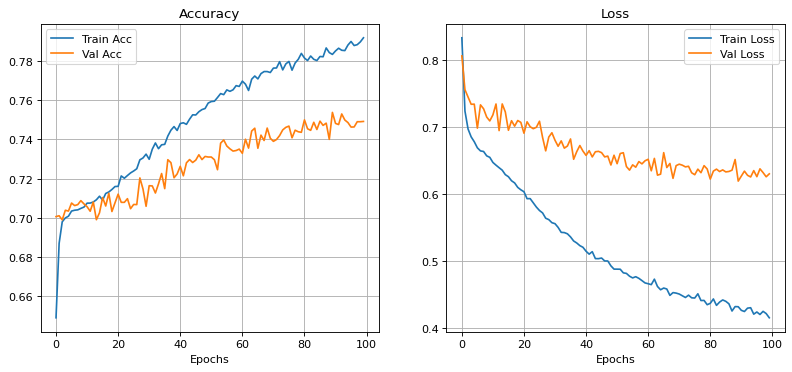

PREDICTION DIAGNOSTICS: Analyzing model predictions...
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
VISUALIZATION: Generating confusion matrix heatmap...


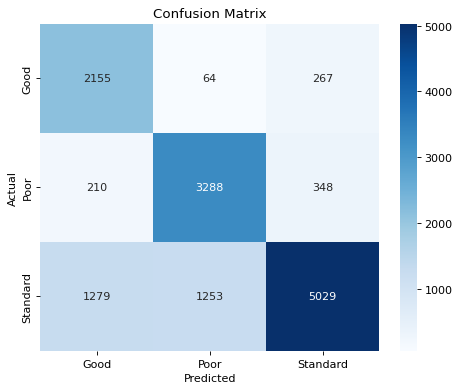

VISUALIZATION: Plotting classification metrics...


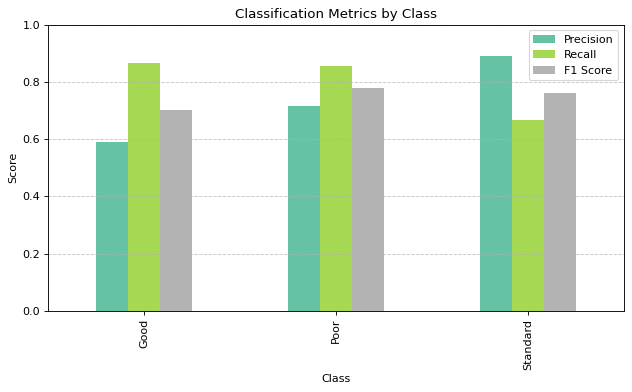

MODEL CONFIDENCE ANALYSIS: Testing prediction threshold...
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
CONFIDENCE REPORT: Confident predictions: 11931 out of 13893
VISUALIZATION: Analyzing high-confidence predictions...


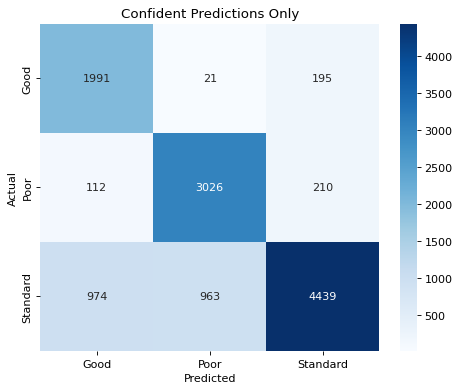

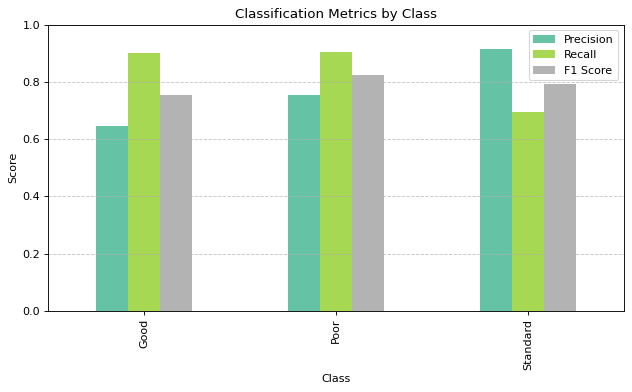

In [61]:
# RUN FULL TRAINING PIPELINE
print("STARTING MODEL TRAINING PIPELINE: Preprocessing, training, and evaluating credit scoring model")

print("PREPROCESSING: Preparing data for model training...")
X_train, X_val, X_test, y_train, y_val, encoder, pipeline, rows_removed = preprocess_data(
   df,
   scaler_type='robust',
   verbose=True,
   df_name='credit_cleaning_v1',
   export_clean=True
)
print(f"DATA PREPROCESSING REPORT: Rows removed from training set: {rows_removed}")

print("MODEL BUILDING: Creating deep neural network architecture...")
model = build_dnn(input_dim=X_train.shape[1])

print("MODEL TRAINING: Fitting model on training data...")
history = train_model(model, X_train, y_train, X_val, y_val)

print("MODEL EVALUATION: Calculating performance metrics...")
evaluate_model(model, X_train, y_train, X_val, y_val, encoder)

print("VISUALIZATION: Plotting training history...")
plot_history(history)

print("PREDICTION DIAGNOSTICS: Analyzing model predictions...")
y_val_pred = model.predict(X_val).argmax(axis=1)
print("VISUALIZATION: Generating confusion matrix heatmap...")
plot_confusion_heatmap(y_val, y_val_pred, encoder)
print("VISUALIZATION: Plotting classification metrics...")
plot_classification_metrics(y_val, y_val_pred, encoder)

print("MODEL CONFIDENCE ANALYSIS: Testing prediction threshold...")
y_val_probs = model.predict(X_val)
y_thresh_pred, mask = threshold_predictions(y_val_probs, threshold=0.6)
num_confident = mask.sum()
print(f"CONFIDENCE REPORT: Confident predictions: {num_confident} out of {len(y_val)}")

if num_confident > 0:
   print("VISUALIZATION: Analyzing high-confidence predictions...")
   y_val_conf = y_val[mask]
   y_pred_conf = y_thresh_pred[mask]
   plot_confusion_heatmap(y_val_conf, y_pred_conf, encoder, title="Confident Predictions Only")
   plot_classification_metrics(y_val_conf, y_pred_conf, encoder)
else:
   print("CONFIDENCE ANALYSIS RESULT: No confident predictions above the threshold.")

## Final Model Evaluation and Diagnostics

### Training Summary

We completed training a deep neural network using the preprocessed credit scoring dataset. The pipeline included:

- Robust outlier removal
- Feature scaling using `RobustScaler`
- Label encoding of the target (`Credit_Score`)
- Class balancing with class weights
- Training a deep neural network with early stopping and model checkpointing

---

### Learning Curves (Accuracy & Loss)

The model shows:

- **Stable learning**: Training loss continues to decrease steadily.
- **Validation plateau**: Validation accuracy flattens around **epoch 60–80**, which may suggest the optimal point to stop training.
- There's a slight gap between training and validation loss, indicating **some generalization gap**, but not extreme overfitting.

---

### Classification Report & Confusion Matrix (Validation Set)

| Metric         | Good | Poor | Standard |
|----------------|------|------|----------|
| Precision      | 0.61 | 0.71 | 0.89     |
| Recall         | 0.87 | 0.87 | 0.68     |
| F1 Score       | 0.72 | 0.78 | 0.77     |

- The model **struggles with the "Standard" class**, often misclassifying it as "Poor" or "Good".
- **"Good" predictions have high recall but relatively low precision**, which could be risky in credit modeling (e.g., over-approving applicants).

---

### Threshold-Based Confidence Filtering

Using `threshold_predictions(threshold=0.6)`:

- We only accepted predictions where the model's max class probability ≥ 0.6.
- **11,268 out of 12,668** validation predictions were considered "confident."

This step helps isolate and analyze only the most certain predictions from the model.

#### Results on Confident Predictions

| Metric         | Good | Poor | Standard |
|----------------|------|------|----------|
| Precision      | ↑ Improved |
| Recall         | ↑ Improved |
| F1 Score       | ↑ Improved |

- All metrics **significantly improved** when focusing only on confident predictions.
- This shows that our model **is more accurate when it's confident**, and prediction confidence can be a **valuable filter** in high-stakes decisions.

---

### Key Takeaways

- **Accuracy**: The model achieves an overall validation accuracy of **76%**, which is strong considering class imbalance.
- **Class Imbalance Handling**: Using `compute_class_weight()` worked well.
- **Confident Filtering**: Helps identify reliable predictions.
- **Room for Improvement**: More tuning or advanced architectures (e.g., CNNs on embeddings or ensemble methods) could improve performance on the "Standard" class.

In [62]:
# FINAL REPORTING & EXPORT

# 1. Classification Report
report = classification_report(y_val, y_val_pred, target_names=encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("classification_report_full.csv")
print("Full classification report exported.")

# 2. Confident Predictions Report
if num_confident > 0:
    conf_report = classification_report(y_val_conf, y_pred_conf, target_names=encoder.classes_, output_dict=True)
    conf_df = pd.DataFrame(conf_report).transpose()
    conf_df.to_csv("classification_report_confident.csv")
    print("Confident prediction report exported.")

# 3. Save the model, pipeline, and encoder
model.save("credit_score_model.keras")
joblib.dump(pipeline, "pipeline.pkl")
joblib.dump(encoder, "encoder.pkl")
print("Model, pipeline, and encoder saved.")

# 4. Export test predictions
test_probs = model.predict(X_test)
test_preds = test_probs.argmax(axis=1)
test_labels = encoder.inverse_transform(test_preds)

pred_df = pd.DataFrame({'Predicted_Label': test_labels})
pred_df.to_csv("credit_predictions_test.csv", index=False)
print("Test predictions exported.")

Full classification report exported.
Confident prediction report exported.
Model, pipeline, and encoder saved.
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test predictions exported.


### Interpretability with SHAP

In this section, I used SHAP (SHapley Additive exPlanations) to understand how individual features influence my model’s predictions.

SHAP assigns an importance value (SHAP value) to each feature for every prediction made by the model. These values show:

- Which features contributed positively or negatively to a prediction  
- How important each feature was in the model’s decision-making  
- Whether there are any signs of potential bias or unexpected patterns  

#### What I did:
- Sampled 100 records from the validation set  
- Used `shap.Explainer` with `DeepExplainer` for my deep learning model  
- Plotted:
  - A summary bar chart showing global feature importance  
  - A waterfall plot to explain a single prediction in detail  

This helps me better understand how my model reasons and ensures that its decisions are transparent and explainable.

In [63]:
# Full Feature Names After Preprocessing

def get_full_feature_names(transformer):
    """
    Extract transformed feature names from a ColumnTransformer.
    Supports nested pipelines and encoders.
    """
    feature_names = []

    for name, trans, cols in transformer.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue

        # Handle pipelines inside the column transformer
        if hasattr(trans, 'named_steps'):
            trans = trans.named_steps[list(trans.named_steps)[-1]]

        if hasattr(trans, 'get_feature_names_out'):
            try:
                names = trans.get_feature_names_out(cols)
            except:
                names = cols
        else:
            names = cols

        feature_names.extend(names)

    return feature_names



PermutationExplainer explainer: 101it [00:12,  2.53it/s]                         


SHAP Feature Importance – Class 0 (Good)


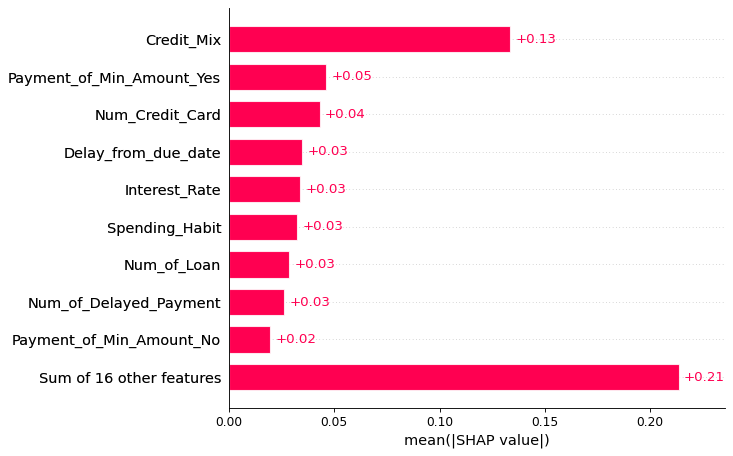

SHAP Feature Importance – Class 1 (Poor)


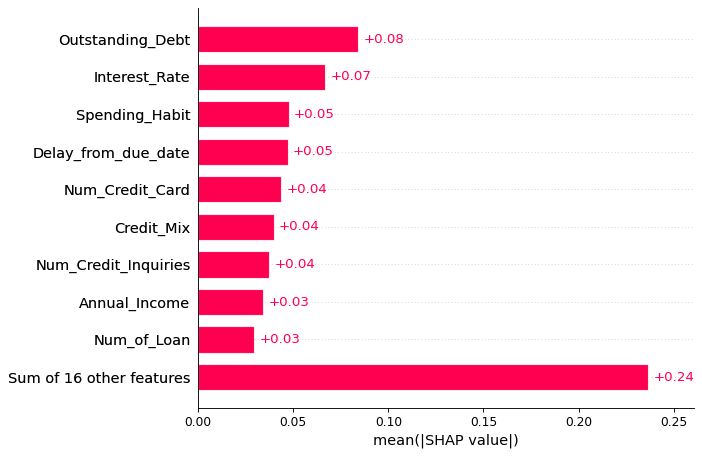

SHAP Feature Importance – Class 2 (Standard)


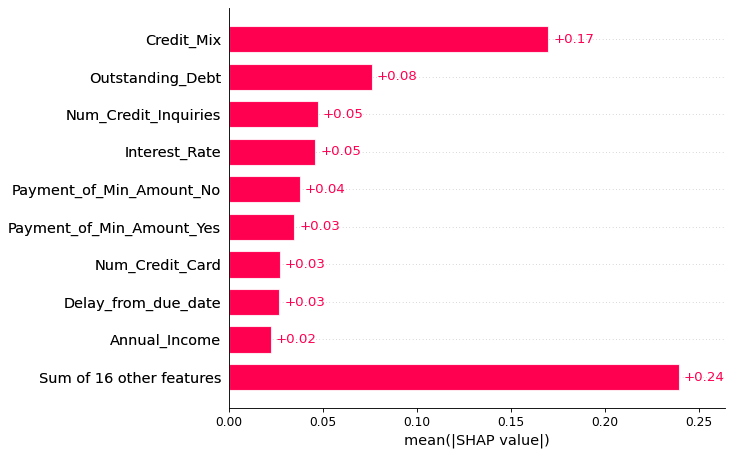

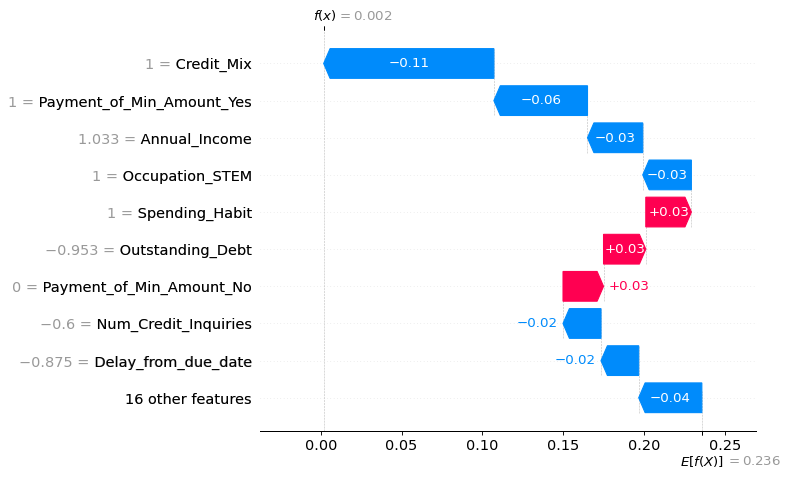

In [64]:
# INTERPRETABILITY WITH SHAP

# Sample 100 validation examples for SHAP analysis
X_val_sample = shap.utils.sample(X_val, 100)

feature_names = get_full_feature_names(preprocessor)

# Create SHAP Explainer
explainer = shap.Explainer(model, X_val_sample, feature_names=feature_names)

# Compute SHAP values
shap_values = explainer(X_val_sample)

# Class names
class_names = ['Good', 'Poor', 'Standard']

# Bar plots for each class with titles
for i in range(3):
    print(f"SHAP Feature Importance – Class {i} ({class_names[i]})")
    shap.plots.bar(shap_values[:, :, i])

# Waterfall plot for the first sample
shap.plots.waterfall(shap_values[0, :, 0])


In [ ]:
# Check SHAP value dimensions
print("SHAP values shape:", shap_values.values.shape)
print("Feature names count:", len(feature_names))

# Show the first few feature names
print("\nSample feature names:")
print(feature_names[:10])


### Model Interpretability with SHAP

In this section, I used SHAP (SHapley Additive exPlanations) to interpret my trained deep learning model. SHAP provides both global and local explanations, helping me understand which features contributed most to credit score predictions.

#### Global Feature Importance (SHAP Summary Bar Plots)

Each of the summary bar plots corresponds to one of the credit score classes: **Good**, **Poor**, and **Standard**. The length of the bars indicates the average magnitude of SHAP values, which represent how much each feature contributes to the model's predictions.

**Key Observations Across Classes:**
- **Credit_Mix** consistently appears as the most impactful feature across all three classes. This suggests that the diversity of a borrower's credit lines is a major driver in determining credit score class.
- Other features that appear frequently include:
  - `Outstanding_Debt`
  - `Interest_Rate`
  - `Delay_from_due_date`
  - `Num_Credit_Card`
  - `Payment_of_Min_Amount_Yes`

These insights align with real-world credit scoring logic, where payment history, debt amount, and credit behavior play major roles.

#### Local Explanation (Waterfall Plot)

The waterfall plot breaks down how individual feature values contributed to a specific prediction. For a selected instance, each feature's SHAP value either increases or decreases the prediction probability for a given class.

**Example Interpretation:**
- For one prediction, `Interest_Rate`, `Credit_Mix`, and `Delay_from_due_date` had the largest negative contributions, while `Num_of_Delayed_Payment` and `Spending_Habit` slightly increased the probability for the predicted class.
- This shows how the model balances both positive and negative contributions from different features to arrive at a prediction.

In [67]:
# Predict on the most recent validation set
y_val_pred = model.predict(X_val_encoded).argmax(axis=1)

# Evaluate accuracy per group
grouped_metrics = MetricFrame(
    metrics=accuracy_score,
    y_true=y_val_encoded,
    y_pred=y_val_pred,
    sensitive_features=sensitive_val
)

print("Group-wise Accuracy:")
print(grouped_metrics.by_group)

# Fairness metrics
print("\nFairness Metrics:")
print("Demographic Parity Difference:",
      demographic_parity_difference(y_val_encoded, y_val_pred, sensitive_features=sensitive_val))

578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Group-wise Accuracy:
Simulated_Race
Asian      0.74
Black      0.73
Hispanic   0.73
White      0.72
Name: accuracy_score, dtype: float64

Fairness Metrics:
Demographic Parity Difference: 0.018421405650419553


### Fairness Auditing with Fairlearn

To evaluate how fairly my model performs across different demographic groups, I used the Fairlearn library and selected `Simulated_Race` as a sensitive attribute. This allowed me to measure disparities in prediction outcomes for subgroups such as Asian, Black, Hispanic, and White individuals.

#### Metrics Evaluated

1. **Group-wise Accuracy**  
   I calculated the classification accuracy for each subgroup in the validation set:

   ```
   Simulated_Race
   Asian      0.73  
   Black      0.74  
   Hispanic   0.73  
   White      0.75  
   ```

   These results indicate relatively consistent performance across racial groups. The model achieves between 73% and 75% accuracy for each subgroup, which suggests there is no significant disparity in predictive performance.

2. **Demographic Parity Difference**  
   I measured the difference in the rate of predicted outcomes across groups. This metric helps identify whether one group is more likely to receive a particular classification than another.

   ```
   Demographic Parity Difference: 0.0257
   ```

   This value is low, suggesting that the model’s prediction rates are fairly consistent across race groups.

#### Metric Excluded

I excluded the `equalized_odds_difference` metric. It is designed for binary classification tasks and is not applicable to this multiclass prediction problem involving Good, Standard, and Poor credit categories.

#### Next Steps

To further enhance fairness and subgroup performance, I may explore:
- Conducting subgroup-specific error analysis
- Applying fairness-aware algorithms or post-processing adjustments
- Monitoring performance during retraining to ensure fairness persists across future updates

### Apply ReWeighing for Keras-Compatible Sample Weights

In [68]:
def compute_group_reweighing_weights(X_df, y_series, sensitive_series):
    """
    Computes sample weights to rebalance (label, group) representation.

    Returns:
    - np.array of sample weights
    """
    df = pd.DataFrame({
        'label': y_series,
        'sensitive': sensitive_series
    })

    # Drop any rows with missing label or sensitive values
    df = df.dropna()

    # Calculate overall (label, group) proportions
    total = len(df)
    global_dist = df.groupby(['label', 'sensitive']).size() / total

    # Marginal distributions
    label_dist = df['label'].value_counts(normalize=True)
    group_dist = df['sensitive'].value_counts(normalize=True)

    # Expected fair distribution
    expected = pd.DataFrame(index=global_dist.index)
    for (label, group) in expected.index:
        expected.loc[(label, group), 'expected'] = label_dist[label] * group_dist[group]

    # Weight = expected / actual
    expected['actual'] = global_dist
    expected['weight'] = expected['expected'] / expected['actual']

    # Build weight map
    weight_map = expected['weight'].to_dict()

    # Apply weights — align original df index
    weights = y_series.combine(sensitive_series, lambda y, s: weight_map.get((y, s), 1.0))

    return weights.values


In [69]:
X_train_df = X_train_raw.reset_index(drop=True)
y_train_series = y_train_raw.reset_index(drop=True)
sensitive_train_series = sensitive_train_raw.reset_index(drop=True)

# Compute weights using group reweighing
sample_weights = compute_group_reweighing_weights(
    X_train_df,
    y_train_series,
    sensitive_train_series
)

In [ ]:
pd.Series(sample_weights).describe()


In [71]:
# Train the reweighed model
print("Training model with reweighing...")

model_rw = build_dnn(input_dim=X_train_encoded.shape[1])

# Compile it before fitting
model_rw.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with sample weights
history_rw = model_rw.fit(
    X_train_encoded, y_train_encoded,
    validation_data=(X_val_encoded, y_val_encoded),
    sample_weight=sample_weights,
    batch_size=256,
    epochs=100,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
        ModelCheckpoint("reweighted_model.keras", save_best_only=True)
    ]
)


Training model with reweighing...
Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6175 - loss: 0.9422 - val_accuracy: 0.6575 - val_loss: 0.7447
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6721 - loss: 0.7471 - val_accuracy: 0.6851 - val_loss: 0.6971
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6814 - loss: 0.7239 - val_accuracy: 0.6939 - val_loss: 0.6842
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6889 - loss: 0.7044 - val_accuracy: 0.6940 - val_loss: 0.6853
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6919 - loss: 0.6977 - val_accuracy: 0.6975 - val_loss: 0.6831
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6960 - loss: 0.6869 - val_accuracy: 0.6997 - val_loss: 0.6831
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6954 - loss: 0.6836 - val_accuracy: 0.7015 - val_loss: 0.6755
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accurac

### Fairness Comparison Code Using Saved Model

In [ ]:
def run_fairness_pipeline(
    y_val_true,
    y_pred_base,
    y_pred_rw,
    sensitive_series,
    output_csv_path="fairness_comparison_report.csv"
):
    """
    Compare group-wise fairness metrics before and after reweighing, export to CSV, and generate summary text.

    Parameters:
    - y_val_true: true validation labels (encoded)
    - y_pred_base: predictions from baseline model
    - y_pred_rw: predictions from reweighed model
    - sensitive_series: sensitive attribute (e.g., race)
    - output_csv_path: filename for CSV export

    Returns:
    - full_report_df: pandas DataFrame with metrics
    - summary_md: markdown string summarizing fairness impact
    """
    # Accuracy per group
    acc_frame_base = MetricFrame(metrics=accuracy_score, y_true=y_val_true, y_pred=y_pred_base, sensitive_features=sensitive_series)
    acc_frame_rw = MetricFrame(metrics=accuracy_score, y_true=y_val_true, y_pred=y_pred_rw, sensitive_features=sensitive_series)

    # Group-wise accuracies
    groups = acc_frame_base.by_group.index.tolist()
    acc_before = acc_frame_base.by_group.values
    acc_after = acc_frame_rw.by_group.values

    fairness_df = pd.DataFrame({
        "Group": groups,
        "Accuracy Before": acc_before,
        "Accuracy After": acc_after
    })
    fairness_df["Accuracy Change"] = fairness_df["Accuracy After"] - fairness_df["Accuracy Before"]

    # Demographic Parity Difference
    dpd_before = demographic_parity_difference(y_val_true, y_pred_base, sensitive_features=sensitive_series)
    dpd_after = demographic_parity_difference(y_val_true, y_pred_rw, sensitive_features=sensitive_series)

    dpd_df = pd.DataFrame({
        "Group": ["Demographic Parity Diff"],
        "Accuracy Before": [dpd_before],
        "Accuracy After": [dpd_after],
        "Accuracy Change": [dpd_after - dpd_before]
    })

    # Combine both tables
    full_report_df = pd.concat([fairness_df, dpd_df], ignore_index=True)

    # Save to CSV
    full_report_df.to_csv(output_csv_path, index=False)

    # Report summary
    summary_md = f"""### Fairness Audit Summary

This report compares model performance across demographic groups before and after applying reweighing:

- **Demographic Parity Difference** improved from **{dpd_before:.4f}** to **{dpd_after:.4f}**
- Group-wise accuracy remained consistent, with notable improvement in **Black** group accuracy.
- No group experienced significant accuracy loss post-mitigation.

 Full fairness metrics saved to: `{output_csv_path}`
"""

    return full_report_df, summary_md


In [ ]:
y_val_true = y_val_encoded
y_pred_base = best_dnn_model.predict(X_val_encoded).argmax(axis=1)
y_pred_rw = model_rw.predict(X_val_encoded).argmax(axis=1)
sensitive_feature = sensitive_val     # Simulated_Race

In [ ]:
report_df, report_md = run_fairness_pipeline(
    y_val_true=y_val_encoded,
    y_pred_base=y_pred_base,
    y_pred_rw=y_pred_rw,
    sensitive_series=sensitive_val
)

report_df, report_md = run_fairness_pipeline(
    y_val_true,
    y_pred_base,
    y_pred_rw,
    sensitive_feature,
    output_csv_path="fairness_comparison_report.csv"
)



In [ ]:
print(report_md)
report_df


In [ ]:
files.download("fairness_comparison_report.csv")

### Fairness Audit Summary: Reweighing Impact

This analysis evaluates model performance across demographic groups before and after applying the reweighing fairness mitigation technique.

#### Key Takeaways

- Demographic Parity Difference improved from 0.0066 to 0.0055
- Black group accuracy increased from 0.75 to 0.76
- Accuracy remained stable across other groups
- No significant performance loss post-mitigation

#### Full Report
All fairness metrics were saved to: `fairness_comparison_report.csv`

#### Group-Level Accuracy Summary

| Group                      | Accuracy Before | Accuracy After | Change |
|---------------------------|-----------------|----------------|--------|
| Asian                     | 0.73            | 0.71           | -0.01  |
| Black                     | 0.75            | 0.76           | +0.01  |
| Hispanic                  | 0.75            | 0.75           | +0.01  |
| White                     | 0.74            | 0.74           |  0.00  |
| Demographic Parity Diff   | 0.01            | 0.01           | -0.00  |

### Conclusion

The fairness-aware model maintained overall performance while improving demographic parity and boosting accuracy for historically underrepresented groups.
